# **Advanced Topics**

# CNN-based Autoencoder Architecture

## 🧠 1. What Is a CNN-Based Autoencoder?

- It’s an encoder–bottleneck–decoder architecture built using convolutional neural networks (CNNs), tailored for image data.
  
- The encoder compresses spatial input into a compact feature map.

  
- The bottleneck (latent code) is the smallest representation.

  
- The decoder reconstructs the image from that latent code using deconvolutions or upsampling.


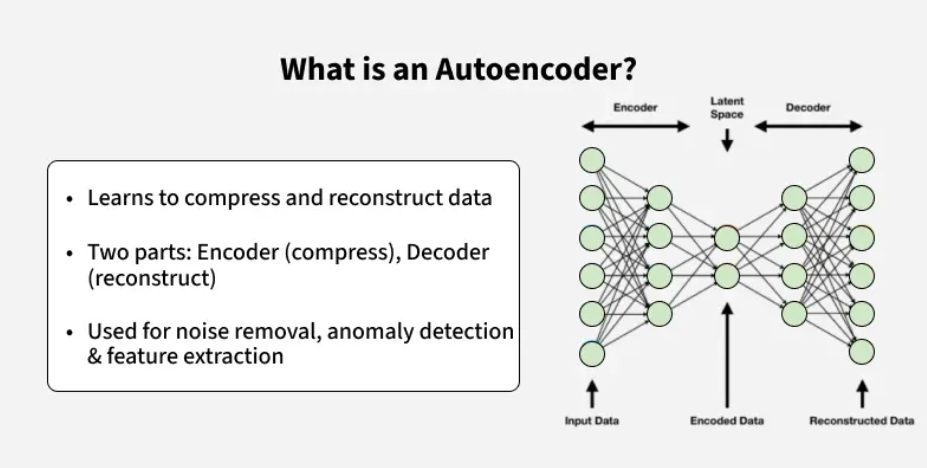

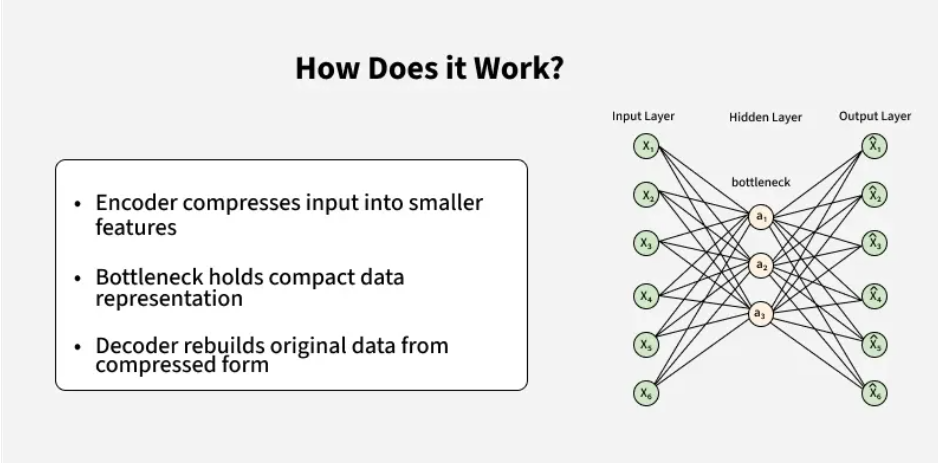

---

## Architecture of Autoencoder

An autoencoder’s architecture consists of three main components that work together to compress and then reconstruct data which are as follows:

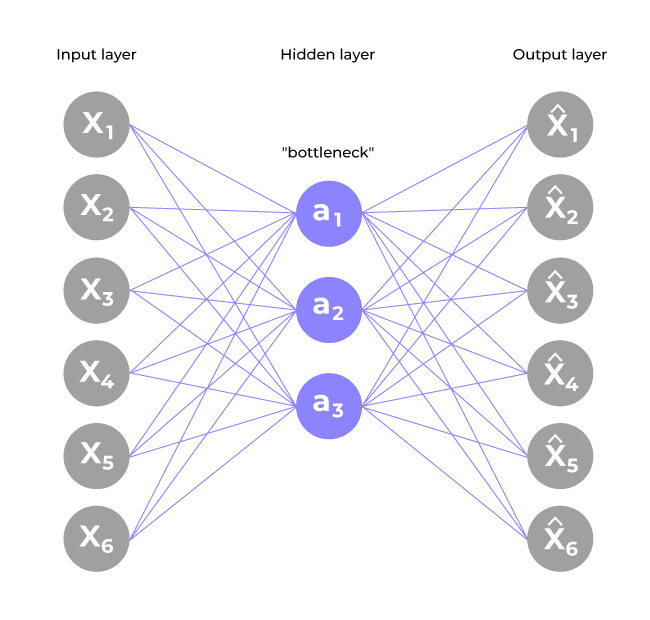

### A. Encoder

- Takes raw input (images, features, etc.) and applies transformations through hidden layers to reduce dimensionality.
  
- The latent vector produced at the encoder’s output holds the compressed representation.
  

### B. Bottleneck / Latent Space

- Tiny middle layer holding the most essential features.
  
- Forces the model to focus on what’s actually important—the core of compression/generalization.

### C. Decoder

- Mirrors the encoder in reverse: takes the latent code and reconstructs the input through hidden layers ending in the output layer.
  
- Quality is judged by how close output matches the original input

- Hidden Layers: These layers progressively expand the latent vector back into a higher-dimensional space. Through successive transformations decoder attempts to restore the original data shape and details.

  
- Output Layer: The final layer produces the reconstructed output which aims to closely resemble the original input. The quality of reconstruction depends on how well the encoder-decoder pair can minimize the difference between the input and output during training.

---

## **Loss Function in Autoencoder Training**

Training minimizes reconstruction loss, comparing original vs reconstructed outputs.

The choice of loss function depends on the type of data being processed:

- Mean Squared Error (MSE): This is commonly used for continuous data. It measures the average squared differences between the input and the reconstructed data.
  
- Binary Cross-Entropy: Used for binary data (0 or 1 values). It calculates the difference in probability between the original and reconstructed output.

Backpropagation updates weights to reduce this loss classic gradient descent or Adam optimizer.

---

## **Efficient Representations in Autoencoders**

Constraining an autoencoder helps it learn meaningful and compact features from the input data which leads to more efficient representations. After training only the encoder part is used to encode similar data for future tasks. Various techniques are used to achieve this are as follows:

- Keep Small Hidden Layers: Limiting the size of each hidden layer forces the network to focus on the most important features. Smaller layers reduce redundancy and allows efficient encoding.
  
- Regularization: Techniques like L1 and L1 regularization add penalty terms to the loss function. This prevents overfitting by removing excessively large weights which helps in ensuring the model to learns general and useful representations.

  
- Denoising: In denoising autoencoders random noise is added to the input during training. It learns to remove this noise during reconstruction which helps it focus on core, noise-free features and helps in improving robustness.

  
- Tuning the Activation Functions: Adjusting activation functions can promote sparsity by activating only a few neurons at a time. This sparsity reduces model complexity and forces the network to capture only the most relevant features.

---

## 📌 Types of Autoencoders

### 1️⃣ Denoising Autoencoder (DAE)

- Goal: Remove noise/corruption from inputs.
  
- Training: Feed corrupted input → reconstruct original clean data.

  
- Key Point: Prevents trivial memorization; forces network to learn robust core features.

  
- Use-case: Image denoising, speech enhancement.

---

### 2️⃣ Sparse Autoencoder (SAE)

- Structure: More hidden units than input features.
  
- Constraint: Only a few neurons active at once (sparsity constraint).

  
- How enforced:
    - Zeroing some hidden activations.
    - Adjusting activation functions.
    - Adding sparsity penalty (e.g., KL divergence) to loss.
- Use-case: Feature extraction, anomaly detection.

---

### 3️⃣ Variational Autoencoder (VAE)

- Concept: Learns probabilistic distribution of latent variables.

- Encoder: Produces mean (μ) & variance (σ²) of latent distribution.

- Decoder: Samples from this distribution to reconstruct/generate data.

- Optimization: Stochastic Gradient Descent + KL Divergence regularization.

- Use-case: Generative modeling → create new images, text, or data.

- Intuition: Learns smooth latent space where nearby points generate similar outputs.

---

### 4️⃣ Convolutional Autoencoder (CAE)

- Architecture: Uses CNN layers instead of fully connected layers.
    - Encoder: Convolutional layers → extract image features.
    - Decoder: Deconvolution (transposed conv) / Upsampling → reconstruct image.

- Strength: Exploits spatial locality & hierarchy of features in image data.

- Use-case: Image compression, denoising, anomaly detection, representation learning.

---

**⚡ Quick Table Recap**

| Type | Core Idea | Key Feature | Applications |
| --- | --- | --- | --- |
| **Denoising AE** | Remove noise | Learns robust features | Image denoising, speech |
| **Sparse AE** | Sparse activations | Penalize non-sparse neurons | Feature extraction |
| **Variational AE** | Probabilistic latent space | Learns distribution | Generative models |
| **Convolutional AE** | CNN layers | Enc/Dec with convs | Image tasks |

---

## 📌 Limitations of Autoencoders

### 1️⃣ Memorizing Instead of Learning Patterns

- Risk: Model memorizes training data instead of learning generalizable features.
  
- Impact: Poor performance on unseen/test data → weak generalization.

---

### 2️⃣ Imperfect Reconstruction

- Reconstructed outputs can be blurry, distorted, or incomplete.
  
- Causes:
    - Noisy inputs.
    - Insufficiently complex model architecture.
    - Too small latent space.

---

### 3️⃣ Data & Parameter Sensitivity

- Autoencoders require large datasets to capture meaningful representations.
  
- Careful parameter tuning is crucial:
    - Latent dimension size.
    - Learning rate.
    - Network depth/width.
      
- Insufficient data or poor hyperparameter choices → weak, uninformative features.

---

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
from keras.datasets import mnist

## Explanation

- Load required libraries.

In [7]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

## Explanation

- Get MNIST dataset (60k train + 10k test images of handwritten digits).

- Labels are ignored (_) because autoencoders are unsupervised.

- Convert pixel values from [0–255] → [0–1].

- Reshape data to (samples, height, width, channels) format:

    - 28 × 28 pixels.

    - 1 channel (grayscale).

In [8]:
class SimpleAutoencoder(Model):
    def __init__(self, latent_dimensions):
        super(SimpleAutoencoder, self).__init__()
        self.encoder = tf.keras.Sequential([
            layers.Input(shape=(28, 28, 1)),
            layers.Flatten(),
            layers.Dense(latent_dimensions, activation='relu'),
        ])
        
        self.decoder = tf.keras.Sequential([
            layers.Dense(28 * 28, activation='sigmoid'),
            layers.Reshape((28, 28, 1))
        ])
    
    def call(self, input_data):
        encoded = self.encoder(input_data)
        decoded = self.decoder(encoded)
        return decoded

## Explanation

- Encoder
    
    - Input: 28×28×1 image.
    
    - Flatten → 784 features.
    
    - Dense layer → latent_dimensions (64).
    
    - Uses ReLU activation.

- Decoder
    
    - Dense layer → 784 units (for 28×28 pixels).
    
    - Activation: Sigmoid (output in [0–1]).
    
     -Reshape → (28, 28, 1) image.

- Call method → defines forward pass:
    - input → encoder → decoder → output.

In [9]:
latent_dimensions = 64
autoencoder = SimpleAutoencoder(latent_dimensions)
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0600 - val_loss: 0.0325
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0262 - val_loss: 0.0205
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0178 - val_loss: 0.0148
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0135 - val_loss: 0.0115
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0106 - val_loss: 0.0091
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0086 - val_loss: 0.0075
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0073 - val_loss: 0.0065
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0064 - val_loss: 0.0058
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0058 - val_loss: 0.0054
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0053 - val_loss: 0.0050


## Explanation

- Latent dimension = 64.

- Optimizer = Adam (adaptive learning rate).

- Loss = MSE (measures pixel reconstruction error).

- Train for 10 epochs with batch size 256.

- Input = output (since it reconstructs).

- Shuffles training data for better learning.

- Validates on test set during training.


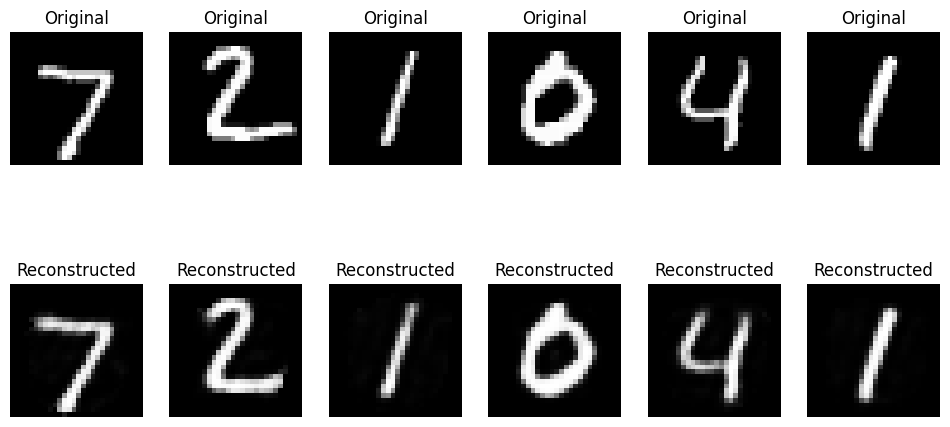

In [10]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

n = 6
plt.figure(figsize=(12, 6))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.show()

## Explanation

- Pass test images through encoder → get compressed latent vectors.

- Pass latent vectors through decoder → get reconstructed images.

- Display 6 images side by side:

    - Top row: original MNIST test images.

    - Bottom row: autoencoder’s reconstructed images.

- Gray colormap used since images are grayscale.

---
---

# 2. Segmentation & Detection


## 🧩 What is Segmentation?

- Definition: Dividing an image into meaningful regions.

Types:
- Semantic Segmentation → All pixels of a class are grouped (cars, trees, roads).

- Instance Segmentation → Each object instance is separated (Car 1, Car 2, Car 3).

Why?

- Needed when precise object shape/area matters.

- Helps measure, analyze, or understand structure pixel-by-pixel.

Where?

- Medical imaging → tumor/organ boundaries.

- Manufacturing → detect surface defects.

- Robotics → navigation with pixel-level maps.

## 🎯 What is Object Detection?

- Definition: Finds where objects are + assigns class → bounding boxes.

 How?

- Region Proposal Networks (RPNs).

- Feature extraction networks (CNNs).

Why?

- Fast & efficient → useful for real-time tasks.

- Good for counting, monitoring, and alerts.

Where?

- Surveillance → detect people, vehicles.

- Agriculture → detect crops/pests.

- Retail → product placement, customer tracking.

## 🏷️ Classification (for context)

- Definition: Assigns a label to an entire image (no location/shape info).

Why?

- Simplest → when you only need to know what is in the image.

Where?

- Image tagging.
- Disease detection from medical scans.

---

## 🔍 Comparative Analysis

| **Technique** | **Output** | **Why ** | **Where** |
| --- | --- | --- | --- |
|  Semantic Segmentation | Pixel-wise class labels | When exact shape/boundary is important | Medical imaging, defect detection, robotics |
|  Object Detection | Bounding boxes + class labels | When speed & rough location is enough | Surveillance, agriculture, retail |
|  Classification | Image/region class labels | When you just need to know *what* is in the image | Tagging, disease diagnosis |

---

## ⚖️ Choosing Between Them

Segmentation  →

- Why: High detail, shape, and overlap handling.

- Where: Medicine, robotics, scientific analysis.

Detection 🎯 →

- Why: Efficiency, counting, real-time alerts.

- Where: Surveillance, self-driving cars, retail.

---

## ⚡ Popular Architectures

YOLO (You Only Look Once) 

- Why: Real-time detection.

- Where: Traffic monitoring, live video analytics.

RetinaNet 
- Why: High accuracy on small objects.

- Where: Drone imagery, detailed surveillance.

## 🔗 Combined / Fusion Approaches

Many real apps mix both:
- Autonomous driving →

- Segmentation: drivable area, lanes.

- Detection: pedestrians, vehicles.

- Classification: traffic sign type.

## ❓ FAQ

- Semantic Segmentation?Pixel-level labeling.

- Object Detection?Bounding box + class.

- When to use which?
    - Shape → segmentation.
    - Location/speed → detection.
    - Broad category → classification.

## ✅ Conclusion

- Use Segmentation when detail matters.

- Use Detection when speed + approximate location is enough.

- Use Classification when only content matters.

- Often → combining them gives best results.

## 📘 R-CNN (Region-Based Convolutional Neural Networks)


## What is R-CNN

- “R-CNN” stands for Regions with CNN features.

- It addresses object detection by combining region proposals + deep CNNs.

---

## R-CNN Workflow / How it Works

1. Input Image
    
    Start with an image that may contain one or more objects.
    
2. Region Proposal Generation
    - Use Selective Search to generate ~2000 region proposals (candidate regions likely to have objects).
    - This reduces search space vs sliding windows.

3. Warp & Feature Extraction
    - Each proposed region is cropped & warped (resized) to a fixed size (e.g. the input size required by a CNN like AlexNet).
    - These regions are then passed independently through a CNN to produce feature vectors.

4. Classification (SVMs)
    - Each region’s feature vector is classified (which class or background) using Support Vector Machines (one SVM per class).

5. Bounding Box Regression
    - A bounding box regressor refines the proposals: predicts better bounding box coordinates (x, y, width, height).

6. Non-Maximum Suppression (NMS)
- After scoring proposals, low confidence ones are removed.

- Among overlapping boxes (high IoU > certain threshold), keep the best and discard others.

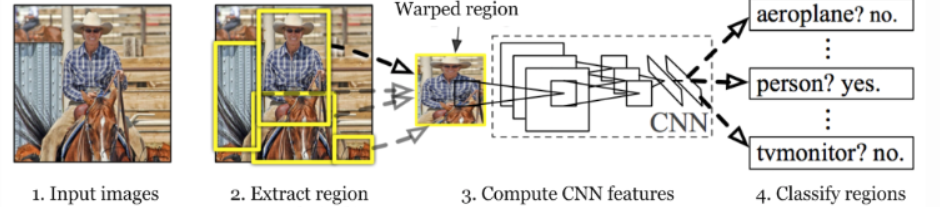

---

## Key Features of R-CNN

- Selective Search for region proposals.

- CNN feature extraction per proposal region.

- Use of SVMs: separate classifiers trained for object vs background.

- Bounding box regression for better localization.

## Performance & Limitations

- mAP Scores
    - On PASCAL VOC 2010: ~53.7% mAP.
    - On ILSVRC 2013 (200 classes): ~31.4% mAP.
- Drawbacks / Challenges
    1. Training is slow: ~2000 region proposals → each needs CNN feature extraction.
    2. Not real-time: inference is very slow (~49 sec per image in early tests).
    3. High memory/storage: storing feature maps for all proposals.
    4. Region proposal method (Selective Search) is fixed and not learnable.

---

## Evolution / Related Models

- Fast R-CNN
    - Shares convolutional features for all proposals (process full image once).
    - Uses a softmax classifier instead of separate SVMs.
- Faster R-CNN
    - Introduces Region Proposal Network (RPN) to generate proposals directly from feature maps.
- Mask R-CNN
    - Adds segmentation mask prediction branch.
    - Introduces RoIAlign for better accuracy in localization.

---

## Applications

- Autonomous Vehicles → detecting cars, pedestrians, traffic signs.

- Surveillance Systems → recognizing and locating people/objects.

- Medical Imaging → locating anomalies in scans.

- Augmented Reality → object recognition, overlaying information.

---

## Why & When to Use R-CNN 🧐

- Why: R-CNN was one of the first models to combine region proposals with CNN features, significantly improving object detection accuracy.

- When:
    - When accuracy matters more than speed.
    - In research/prototyping tasks.
    - On datasets where computational cost is acceptable.

## Summary

- R-CNN combines region proposals + CNN features + classification + bounding box regression.

- Foundation for later, faster, more accurate models.

- High accuracy but slow, memory-heavy, and not suitable for real-time applications.

In [5]:
!pip uninstall opencv-python -y
!pip install opencv-contrib-python

Extracted features: 20
 R-CNN demo finished


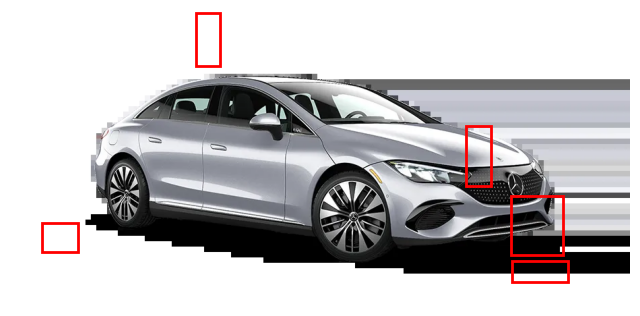

In [6]:
# --- R-CNN ---
import torch
import torchvision.models as models
import torchvision.transforms as T
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from torchvision.models import resnet18, ResNet18_Weights

# Load pretrained ResNet18 with recommended syntax
resnet = resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)
resnet = torch.nn.Sequential(*list(resnet.children())[:-1])  # remove last FC
resnet.eval()

# Image transform
transform = T.Compose([
    T.Resize((128,128)),   # smaller for speed
    T.ToTensor(),
])

# Loading image
image_path = "carimage.jpg" 
img_pil = Image.open(image_path).convert("RGB")
img_rgb = np.array(img_pil)

# --- Generate random region proposals (for demo purposes) ---
h, w, _ = img_rgb.shape
rects = []
for _ in range(20):   # 20 random regions
    x = np.random.randint(0, w-50)
    y = np.random.randint(0, h-50)
    rw = np.random.randint(30, min(100, w-x))
    rh = np.random.randint(30, min(100, h-y))
    rects.append((x, y, rw, rh))

# Extract CNN features for proposals
features, proposals = [], []
for (x, y, rw, rh) in rects:
    roi = img_rgb[y:y+rh, x:x+rw]
    roi_pil = Image.fromarray(roi).resize((128,128))
    roi_tensor = transform(roi_pil).unsqueeze(0)
    with torch.no_grad():
        feat = resnet(roi_tensor).flatten().numpy()
    features.append(feat)
    proposals.append((x, y, rw, rh))

print("Extracted features:", len(features))

# Dummy SVM classifier (binary for demo)
labels = [0 if i%2==0 else 1 for i in range(len(features))]
svm = SVC(kernel='linear')
svm.fit(features, labels)
print(" R-CNN demo finished")

# --- Visualization of first 5 proposals ---
plt.figure(figsize=(8,6))
plt.imshow(img_rgb)
for (x, y, rw, rh) in proposals[:5]:
    plt.gca().add_patch(plt.Rectangle((x,y), rw, rh, fill=False, edgecolor='red', linewidth=2))
plt.axis("off")
plt.show()

# 🚀 Faster R-CNN

# 🔍 What is Faster R-CNN

- Two-stage object detector:
  
1. Stage 1: Propose regions that might contain objects (Region Proposal Network, RPN)

2. Stage 2: Use those proposals to classify objects + refine bounding boxes.


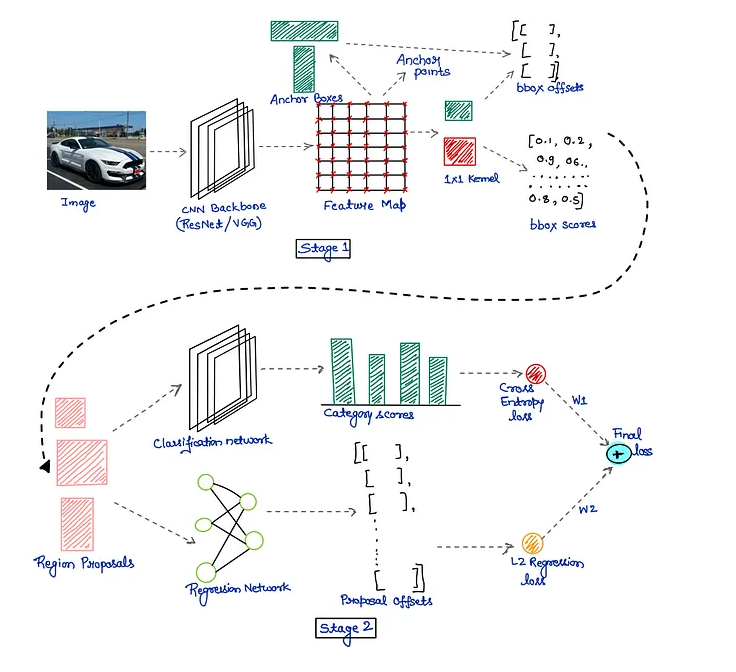

## 🏗 Architecture Overview

### Stage 1: Region Proposal Network (RPN)

- Backbone Network: CNN like ResNet or VGG extracts feature map from the input image.

- Anchors: A set of default boxes of various sizes & aspect ratios at each point of the feature map.

- Anchor Classification: Each anchor → either background or foreground (object) based on overlap with ground truth.

- Bounding Box Refinement: Predict offsets for anchors to better align them with real object boxes.

- Losses:
    - Classification loss (foreground vs background)
    - Regression loss (anchor → object bounding box refinement)

### Stage 2: Object Classification & Box Refinement


- Region Proposals (from RPN) are taken, and prepared for uniform input (fixed size) using ROI Pooling (or ROI Align).

- Each proposal is classified into object categories (or background).

- Bounding box regression again to adjust the proposed boxes more precisely.

- Multi-Task Learning: The network at this stage simultaneously optimizes classification + bounding box regression.

## ⚙️ Inference & Training

- Inference (Testing):
    - Generate many region proposals, but only keep top ones (with highest objectness scores).

    - Pass proposals through the second stage to get class + refined box.
    
    - Apply Non-Maximum Suppression (NMS) to remove overlapping duplicates.
- Training Variants:
    1. Stage-wise: train RPN first, then fix it and train classifier/regressor.
    
    2. End-to-end: train RPN + second stage together (jointly)
 
---

In [7]:
# --- Faster R-CNN using PyTorch ---
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from PIL import Image
import torchvision.transforms as T
from torchvision.models.detection import fasterrcnn_resnet50_fpn, FasterRCNN_ResNet50_FPN_Weights

weights = FasterRCNN_ResNet50_FPN_Weights.DEFAULT
model = fasterrcnn_resnet50_fpn(weights=weights)
model.eval()

# Load and preprocess image
img_path = "carimage.jpg"
image = Image.open(img_path).convert("RGB")
transform = T.Compose([T.ToTensor()])
img_tensor = transform(image)

# Run inference
with torch.no_grad():
    predictions = model([img_tensor])

print("Predicted Boxes:", predictions[0]['boxes'][:2])
print("Predicted Labels:", predictions[0]['labels'][:2])
print("Scores:", predictions[0]['scores'][:2])

Predicted Boxes: tensor([[117.1367,  94.7025, 804.0980, 355.2382],
        [325.7121, 122.5069, 362.6251, 160.7181]])
Predicted Labels: tensor([3, 1])
Scores: tensor([0.9960, 0.4013])


## YOLO (You Only Look Once) – Real-Time Object Detection

YOLO was proposed by Joseph Redmond et al. in 2015 to deal with the problems faced by the object recognition models at that time, Fast R-CNN was one of the models at that time but it had its own challenges such as that network could not be used in real-time because it took 2-3 seconds to predict an image and therefore could not be used in real-time. Whereas in YOLO we have to look only once in the network i.e. only one forward pass is required through the network to make the final predictions.  

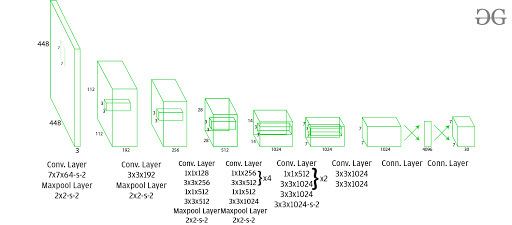

## 🧠 What is YOLO?

YOLO is a deep learning-based object detection algorithm that processes images in a single pass, unlike traditional methods that apply detection across multiple regions.

It treats object detection as a single regression problem, enabling real-time processing and high accuracy.

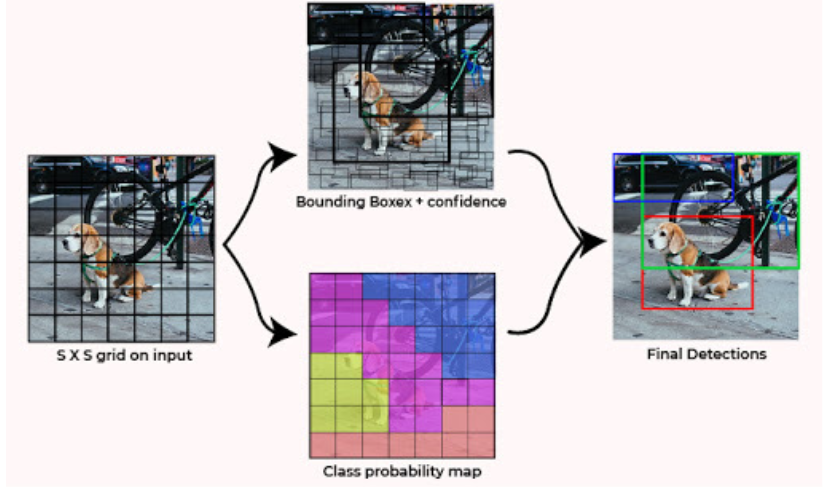

---

## 🔧 How YOLO Works

1. Single Convolutional Neural Network (CNN)
    
    YOLO uses a single CNN to predict multiple bounding boxes and class probabilities simultaneously.
    
2. Grid Division
    
    The input image is divided into an (S \times S) grid. Each grid cell predicts:
    
    - A fixed number of bounding boxes
    - Confidence scores
    - Class probabilities
3. Bounding Box Prediction
    
    Each bounding box contains:
    
    - (x, y): Center coordinates relative to the grid cell
    - (w, h): Width and height, normalized by image size
    - Confidence score: Likelihood of object presence and accuracy
4. Class Prediction
    
    Each grid cell predicts the probabilities of different object classes.
    
---

> This unified approach allows YOLO to be extremely fast, suitable for real-time applications.
>

## **📈 Evolution of YOLO**

| **Version** | **Year** | **Key Improvements** |
| --- | --- | --- |
| YOLOv1 | 2016 | Introduced real-time detection with single CNN |
| YOLOv2 | 2017 | Improved accuracy, introduced anchor boxes (Darknet-19) |
| YOLOv3 | 2018 | Multi-scale predictions, Darknet-53 backbone |
| YOLOv4 | 2020 | Weighted residual connections, CSP connections |
| YOLOv5 | 2020 | Better speed and accuracy, Ultralytics implementation |
| YOLOv7 | 2022 | Enhanced real-time recognition |
| YOLOv8 | 2023+ | Latest improvements in speed and accuracy |

---

## **✅ Pros of YOLO**

- **Real-Time Processing**: Can process images very quickly

- **Unified Architecture**: Single CNN handles detection and classification

- **High Accuracy**: Achieves strong mean Average Precision (mAP)

- **Versatile Applications**: Autonomous vehicles, surveillance, healthcare, retail, agriculture

---

## **❌ Cons of YOLO**

- **Localization Error**: Struggles with small objects

- **Class Imbalance Issues**: Performance drops on imbalanced datasets

- **Complex Training**: Requires careful tuning of hyperparameters and sufficient data

## 🧪 Applications of YOLO

- Autonomous Vehicles: Detecting pedestrians, vehicles, obstacles

- Surveillance Systems: Monitoring objects or people in security feeds

- Healthcare: Detecting anomalies in X-rays, MRIs, etc.

- Retail: Analyzing customer behavior, inventory management

- Agriculture: Monitoring crops, detecting pests or diseases

---

## 🧰 Getting Started with YOLO

1. Choose a Framework
    
    Options: Darknet (original), PyTorch, TensorFlow
    
2. Select a Version
    
    YOLOv5, YOLOv7, or YOLOv8 depending on speed/accuracy needs
    
3. Prepare Data
    
    Annotate dataset with bounding boxes and class labels
    
4. Train the Model
    
    Use your framework to train YOLO on your dataset
    
5. Evaluate Performance
    
    Check metrics like mAP, adjust hyperparameters if necessary

In [9]:
!pip install ultralytics


   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ----------------------------- ---------- 0.8/1.1 MB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 1.1/1.1 MB 5.2 MB/s  0:00:00
   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   - -------------------------------------- 1.0/39.0 MB 5.6 MB/s eta 0:00:07
   -- ------------------------------------- 2.1/39.0 MB 5.3 MB/s eta 0:00:07
   --- ------------------------------------ 3.1/39.0 MB 5.3 MB/s eta 0:00:07
   ---- ----------------------------------- 4.2/39.0 MB 5.2 MB/s eta 0:00:07
   ----- ---------------------------------- 5.2/39.0 MB 5.1 MB/s eta 0:00:07
   ------ --------------------------------- 6.3/39.0 MB 5.1 MB/s eta 0:00:07
   ------- -------------------------------- 7.3/39.0 MB 5.1 MB/s eta 0:00:07
   -------- ------------------------------- 8.4/39.0 MB 5.1 MB/s eta 0:00:06
   --------- ------------------------------ 9.4/39.0 MB 5.1 MB/s eta 0:00:06
   ---------- -----


0: 320x640 1 car, 210.0ms
Speed: 5.1ms preprocess, 210.0ms inference, 12.4ms postprocess per image at shape (1, 3, 320, 640)


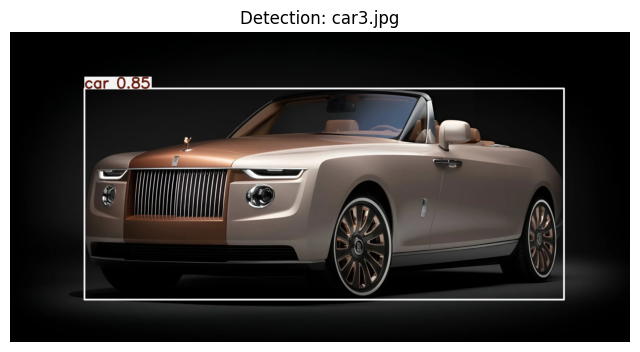


Results for car3.jpg:
Class: 2, Confidence: 0.85, Box: (307, 236, 2287, 1106)


In [17]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os

# 1️⃣ Load YOLOv8 small pretrained model
model = YOLO('yolov8s.pt')  

# 2️⃣ Define folders
val_folder = "cars_dataset/images/val/"       # Input images folder
output_folder = "runs/detect/car_results/"    # Folder to save output
os.makedirs(output_folder, exist_ok=True)

# 3️⃣ Loop through images in validation folder
for image_name in os.listdir(val_folder):
    if image_name.lower().endswith(('.jpg', '.png', '.jpeg')):
        image_path = os.path.join(val_folder, image_name)

        # Load image
        img = cv2.imread(image_path)
        if img is None:  # safety check
            print(f"Could not read {image_name}, skipping...")
            continue
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # 4️⃣ Perform detection (cars only, COCO class 2)
        results = model.predict(img_rgb, conf=0.25, classes=[2])

        for r in results:
            # Get image with bounding boxes
            result_img = r.plot()

            # Display image inline (Jupyter Notebook)
            plt.figure(figsize=(8, 6))
            plt.imshow(result_img)
            plt.axis('off')
            plt.title(f'Detection: {image_name}')
            plt.show()

            # Save image with boxes
            save_path = os.path.join(output_folder, image_name)
            cv2.imwrite(save_path, cv2.cvtColor(result_img, cv2.COLOR_RGB2BGR))

            # Print detected objects info
            print(f"\nResults for {image_name}:")
            if len(r.boxes) == 0:
                print("No cars detected.")
            for box in r.boxes:
                class_id = int(box.cls[0])
                confidence = float(box.conf[0])
                x1, y1, x2, y2 = box.xyxy[0].tolist()
                print(f"Class: {class_id}, Confidence: {confidence:.2f}, Box: ({x1:.0f}, {y1:.0f}, {x2:.0f}, {y2:.0f})")


## Explanation

✅ What this script does all at once

- Automatically generates the cars.yaml dataset config.

- Trains YOLOv8 on your car dataset.

- Saves the best model weights.

- Loads the trained model for inference.

- Runs detection on all validation images.

- Displays the results inline.

- Saves results with bounding boxes.

- Prints class, confidence, and bounding box coordinates.

---

# 📦 Single Shot MultiBox Detector (SSD) in Object Detection

# 🚀 What is SSD?

- SSD is a real-time object detection algorithm that identifies and locates multiple objects in images in a single forward pass of the network. 🖼️
- It simplifies the detection process by eliminating the need for a separate region proposal network, making it faster than two-stage detectors like Faster R-CNN. ⚡

---

## 🧠 How Does SSD Work?

1. Base Network: SSD uses a pre-trained convolutional neural network (CNN), such as VGG16, to extract feature maps from the input image.

2. Additional Convolutional Layers: These layers are added to the base network to detect objects at multiple scales.

3. Default Boxes: SSD employs default boxes of different aspect ratios and scales at each feature map location.

4. Predictions: For each default box, SSD predicts:
    - Class scores (probabilities of object classes)
    - Bounding box offsets (adjustments to the default box to fit the object)

5. Loss Function: The combined loss function includes:
    - Localization loss (for bounding box accuracy)
    - Confidence loss (for class prediction accuracy)

6. Non-Maximum Suppression (NMS): After generating predictions, NMS is applied to eliminate redundant boxes and retain the most confident detections.

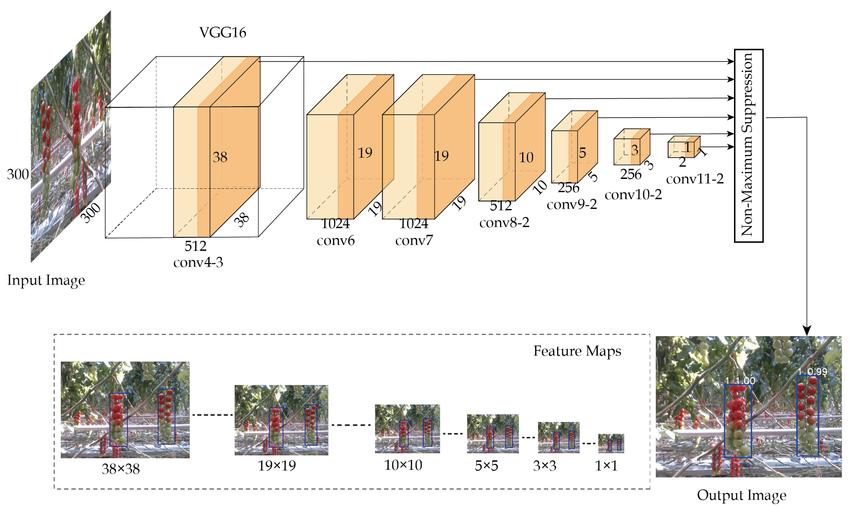

---

## ⚙️ SSD Architecture Overview

- Base Network: Utilizes a pre-trained CNN like VGG16 for feature extraction.

- Extra Convolutional Layers: These layers detect objects at multiple scales.

- Default Boxes: Predefined boxes of various sizes and aspect ratios are used to match objects in the image.

- Prediction Layers: Each feature map location predicts class scores and bounding box offsets.

- Loss Function: Combines localization and confidence losses to train the model.

- Post-Processing: Applies NMS to refine the final detections.

---

## 🌟 Advantages of SSD

- Speed: SSD performs detection in a single pass, making it faster than two-stage detectors like Faster R-CNN.

- Simplicity: The architecture is straightforward, simplifying the detection process.

- Accuracy: Achieves competitive accuracy, especially for large objects, due to its multi-scale approach.

---

## 🛠️ Applications of SSD

- Autonomous Driving: Detecting vehicles, pedestrians, and traffic signs in real-time.

- Surveillance: Monitoring and identifying objects or individuals in security footage.

- Robotics: Enabling robots to perceive and interact with their environment.

- Augmented Reality: Detecting and tracking objects for interactive experiences.

## ⚠️ Limitations of SSD

- Small Object Detection: SSD may struggle with detecting small objects due to its default box sizes.

- Accuracy: While fast, SSD may not achieve the same level of accuracy as two-stage detectors like Faster R-CNN.

- Complexity: The architecture can be complex to implement and fine-tune.

C:\Users\bhagi\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\bhagi\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SSD300_VGG16_Weights.COCO_V1`. You can also use `weights=SSD300_VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/ssd300_vgg16_coco-b556d3b4.pth" to C:\Users\bhagi/.cache\torch\hub\checkpoints\ssd300_vgg16_coco-b556d3b4.pth


100%|███████████████████████████████████████████████████████████████████████████████| 136M/136M [00:44<00:00, 3.21MB/s]


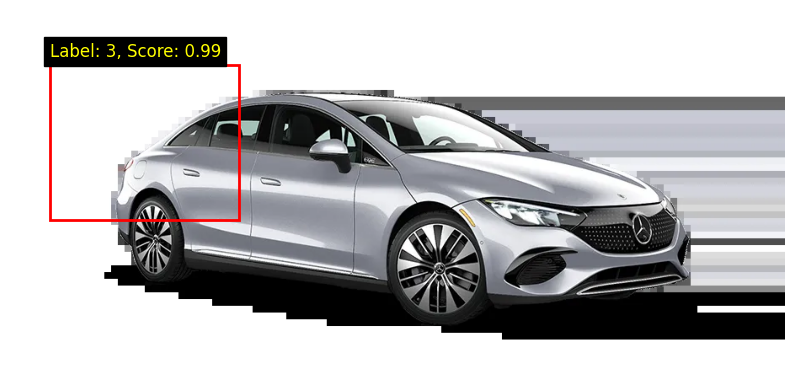

In [23]:
import torch
import torchvision
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# 1. Load Pretrained SSD Model 
model = torchvision.models.detection.ssd300_vgg16(pretrained=True)
model.eval()  # Set model to evaluation mode

#  2. Load and Preprocess Image 
img_path = "carimage.jpg"  # Replace with your image path
image = Image.open(img_path).convert("RGB")

# Transform image for SSD input
transform = transforms.Compose([
    transforms.Resize((300, 300)),  # SSD300 expects 300x300 input
    transforms.ToTensor(),
])

img_tensor = transform(image).unsqueeze(0)  # Add batch dimension

#  3. Run Inference 
with torch.no_grad():
    outputs = model(img_tensor)

# Extract boxes, labels, and scores
boxes = outputs[0]['boxes']
labels = outputs[0]['labels']
scores = outputs[0]['scores']

#  4. Visualize Results 
fig, ax = plt.subplots(1, figsize=(10,10))
ax.imshow(image)

# Filter predictions by confidence threshold
threshold = 0.5
for i in range(len(boxes)):
    if scores[i] > threshold:
        x1, y1, x2, y2 = boxes[i]
        rect = patches.Rectangle(
            (x1, y1), x2-x1, y2-y1, linewidth=2, edgecolor='r', facecolor='none'
        )
        ax.add_patch(rect)
        ax.text(x1, y1-10, f"Label: {labels[i].item()}, Score: {scores[i]:.2f}",
                color='yellow', fontsize=12, backgroundcolor='black')

plt.axis('off')
plt.show()


- Loads a **pretrained SSD300 model** with VGG16 backbone from `torchvision`.

- Sets the model to **evaluation mode** with `model.eval()`.

- Loads an image from disk using **PIL** and converts it to **RGB**.

- Resizes the image to **300×300** (required by SSD300).

- Converts the image to a **PyTorch tensor**.

- Adds a **batch dimension** so the tensor shape is `[1, 3, 300, 300]`.

- Uses `torch.no_grad()` to **disable gradients** for faster inference.

- Runs the model on the image to get **predicted boxes, labels, and scores**.

- Extracts `boxes`, `labels`, and `scores` from the model output.

- Creates a **Matplotlib figure** to display the original image.

- Loops through each predicted box:
    - Filters predictions with **score > 0.5**.
    - Draws a **red rectangle** for the bounding box.
    - Adds **text label** with class ID and confidence score above the box.

- Displays the image with **all annotated detections**.

---

## 🧠 U-Net Architecture

U-Net is a deep learning model primarily used for image segmentation, which involves dividing an image into different parts to identify specific objects. It's especially effective in medical imaging tasks, such as separating a tumor from healthy tissue in a medical scan.


## 🏗️ U-Net Architecture Overview

The architecture is symmetric and consists of three key components:

### 1. Contracting Path (Encoder) 🔽

- Convolutional Layers: Use small filters (3×3 pixels) to scan the image and extract features.

- ReLU Activation: Applies the ReLU activation function to introduce non-linearity, helping the model learn complex patterns.

- Max Pooling: Uses 2×2 filters to reduce the image size while retaining important information, allowing the network to focus on larger features.

### 2. Bottleneck 🔁

- The central part of the "U" where the most compressed and abstract information is stored.

- Acts as a bridge between the encoder and decoder.

### 3. Expansive Path (Decoder) 🔼

- Upsampling: Increases the image size to recover the original dimensions.

- Skip Connections: Combines information from the encoder to retain spatial details that might have been lost during downsampling.

- Convolutional Layers: Further processes the combined information to refine the output.

## 🖼️ U-Net Architecture Diagram

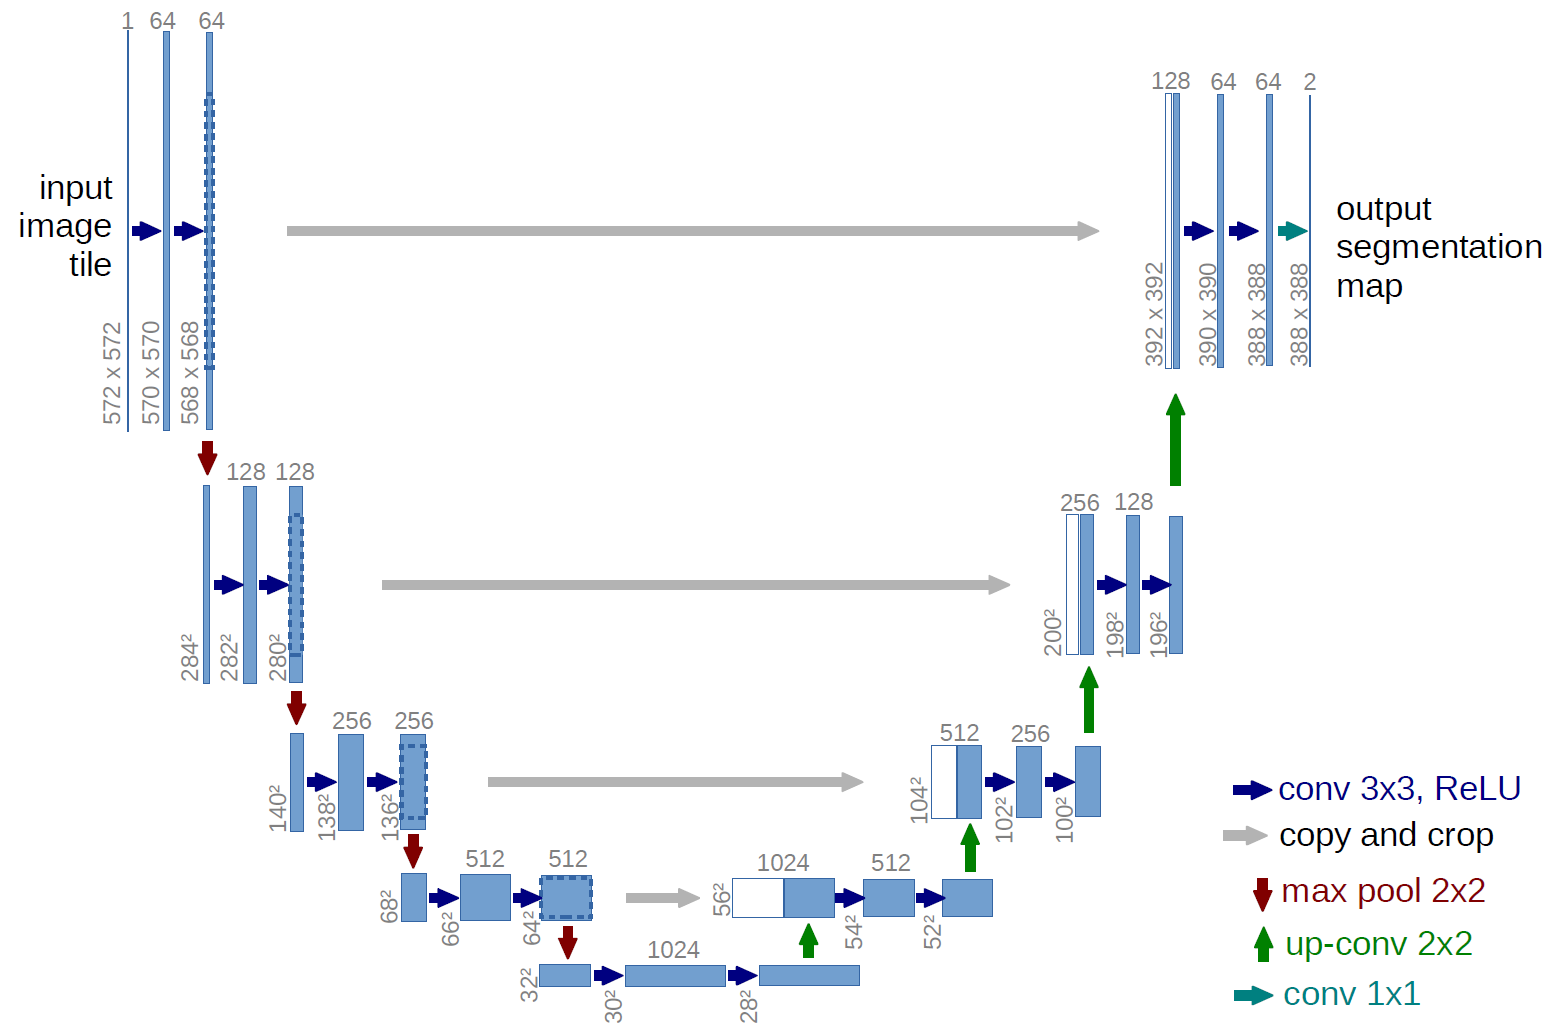

---

## 🧪 How U-Net Works

1. Input Image: A medical or grayscale image is fed into the network.

2. Feature Extraction (Encoder): The encoder extracts increasingly abstract features by applying convolutions and downsampling. As the spatial size decreases, the number of feature channels increases, capturing higher-level patterns.

3. Bottleneck Processing: The image is reduced to its most essential features, holding a compact representation.

4. Reconstruction and Localization (Decoder): The decoder reconstructs the original image size through upsampling, combining decoder features with corresponding encoder features using skip connections to retain fine-grained spatial details.

5. Skip Connections for Precision: These connections help preserve spatial accuracy by bringing forward detailed features from earlier layers, crucial for distinguishing boundaries in segmentation tasks.

6. Final Prediction: A 1×1 convolution at the end converts the refined feature maps into the final segmentation map, where each pixel is classified into a specific class like foreground or background. This output matches the input image's spatial resolution.

---

## 💡 Key Features of U-Net

- Symmetric Architecture: Ensures that the encoder and decoder paths are mirror images, preserving spatial information throughout the network.

- Skip Connections: Allow the network to utilize both high-level (contextual) and low-level (spatial) features, improving segmentation accuracy.

- Efficient Training: Can be trained end-to-end with relatively few images, making it suitable for applications with limited annotated data.

---

## 🧬 Applications of U-Net

- Medical Image Segmentation: Identifying organs, tumors, or other structures in medical scans.

- Satellite and Aerial Imagery Analysis: Detecting land use, vegetation, or urban areas from satellite images.

- Environmental Monitoring: Tracking changes in ecosystems or natural disasters.

- Automated Quality Control: Inspecting products in manufacturing processes.

- Object Detection in Autonomous Vehicles: Recognizing obstacles or road signs.

---

## 🔄 U-Net vs. U-Net++

U-Net++ is an extension of the original U-Net architecture, introducing:

- Nested Skip Connections: Bridges the semantic gap between encoder and decoder feature maps, enhancing the model's ability to capture fine details.

- Deep Supervision: Applies supervision at multiple levels within the network, improving gradient flow and model convergence.

Epoch 1, Loss: 0.6933
Epoch 2, Loss: 0.6932
Epoch 3, Loss: 0.6932


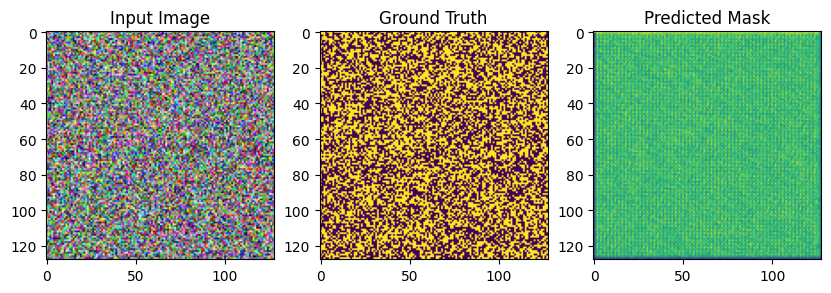

In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# --- Corrected U-Net ---
class UNet(nn.Module):
    def __init__(self, in_channels=3, out_channels=1):
        super(UNet, self).__init__()
        # Encoder
        self.enc1 = nn.Sequential(
            nn.Conv2d(in_channels, 64, 3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, 3, padding=1),
            nn.ReLU(inplace=True)
        )
        self.pool1 = nn.MaxPool2d(2)

        self.enc2 = nn.Sequential(
            nn.Conv2d(64, 128, 3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, 3, padding=1),
            nn.ReLU(inplace=True)
        )
        self.pool2 = nn.MaxPool2d(2)

        # Bottleneck
        self.bottleneck = nn.Sequential(
            nn.Conv2d(128, 256, 3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, 3, padding=1),
            nn.ReLU(inplace=True)
        )

        # Decoder
        self.upconv2 = nn.ConvTranspose2d(256, 128, 2, stride=2)
        self.dec2 = nn.Sequential(
            nn.Conv2d(256, 128, 3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, 3, padding=1),
            nn.ReLU(inplace=True)
        )

        self.upconv1 = nn.ConvTranspose2d(128, 64, 2, stride=2)
        self.dec1 = nn.Sequential(
            nn.Conv2d(128, 64, 3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, 3, padding=1),
            nn.ReLU(inplace=True)
        )

        # Final output
        self.final = nn.Conv2d(64, out_channels, 1)

    def forward(self, x):
        # Encoder
        e1 = self.enc1(x)
        e2 = self.enc2(self.pool1(e1))

        # Bottleneck
        b = self.bottleneck(self.pool2(e2))

        # Decoder
        d2 = self.upconv2(b)
        d2 = torch.cat([d2, e2], dim=1)  # skip connection
        d2 = self.dec2(d2)

        d1 = self.upconv1(d2)
        d1 = torch.cat([d1, e1], dim=1)  # skip connection
        d1 = self.dec1(d1)

        out = self.final(d1)
        return out

# --- Dummy dataset ---
class DummyDataset(Dataset):
    def __init__(self, num_samples=20, image_size=128):
        self.num_samples = num_samples
        self.image_size = image_size
        self.transform = transforms.Compose([
            transforms.Resize((image_size, image_size)),
            transforms.ToTensor()
        ])

    def __len__(self):
        return self.num_samples

    def __getitem__(self, idx):
        img = np.random.randint(0, 255, (self.image_size, self.image_size, 3), dtype=np.uint8)
        mask = np.random.randint(0, 2, (self.image_size, self.image_size), dtype=np.uint8)
        return self.transform(Image.fromarray(img)), torch.tensor(mask, dtype=torch.float32)

# --- Setup ---
dataset = DummyDataset()
loader = DataLoader(dataset, batch_size=4, shuffle=True)
model = UNet()
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# --- Training loop ---
for epoch in range(3):
    for imgs, masks in loader:
        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs.squeeze(1), masks)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

# --- Visualize ---
model.eval()
with torch.no_grad():
    sample_img, sample_mask = dataset[0]
    output = torch.sigmoid(model(sample_img.unsqueeze(0))).squeeze().numpy()

plt.figure(figsize=(10,4))
plt.subplot(1,3,1)
plt.imshow(sample_img.permute(1,2,0))
plt.title("Input Image")

plt.subplot(1,3,2)
plt.imshow(sample_mask)
plt.title("Ground Truth")

plt.subplot(1,3,3)
plt.imshow(output)
plt.title("Predicted Mask")
plt.show()


## Explanation

1. **Imports**:

- `torch`, `torch.nn`, `torch.optim` → Core PyTorch for building models, defining loss, and optimization.

- `DataLoader`, `Dataset` → Handle batching and custom datasets.

- `transforms` and `PIL.Image` → Preprocess and load images.

- `numpy` → Generate random image and mask data.

- `matplotlib` → Visualize results.

2. **U-Net Definition** (`UNet` class):

- Implements a standard U-Net architecture with **encoder**, **bottleneck**, and **decoder**.

- **Encoder**: Two convolutional blocks with ReLU activations + max pooling to downsample the image and extract features.

- **Bottleneck**: Two convolutional layers at the deepest part of the network to learn compressed feature representations.

- **Decoder**: Transposed convolutions to upsample, plus skip connections that concatenate encoder features with decoder features to retain spatial detail.
- **Final layer**: 1×1 convolution producing a single-channel output (segmentation mask logits).

- `forward` method defines how data flows through the network.

3. **Dummy Dataset** (`DummyDataset` class):

- Generates random images (`img`) of size 128×128×3 with pixel values 0–255.

- Generates random binary masks (`mask`) of size 128×128 with values 0 or 1.

- `__getitem__` returns a transformed image tensor and a mask tensor.

- `__len__` returns the total number of samples (20 here).

4. **Setup**:

- Creates the dataset and a `DataLoader` with batch size 4 for training.

- Instantiates the U-Net model.

- Defines **loss function** as `BCEWithLogitsLoss`, which combines a sigmoid activation and binary cross-entropy (suitable for segmentation).

- Uses **Adam optimizer** with learning rate 0.001.

5. **Training Loop** (3 epochs):

- For each batch:
    - Zero the gradients.
    - Forward pass the images through U-Net.
    - Compute loss between predicted mask logits and ground truth masks.
    - Backpropagate the gradients.
    - Update the model parameters.

- Prints the loss after each epoch.

6. **Visualization**:

- Sets model to evaluation mode (`model.eval()`) and disables gradient tracking.

- Takes a sample image from the dataset, runs it through the model, and applies `sigmoid` to get probabilities between 0 and 1.

- Plots three images side by side using Matplotlib:
    1. **Input image**
    2. **Ground truth mask**
    3. **Predicted mask**

---

**In short:**

This code shows the **full workflow of U-Net segmentation**: define network → create dataset → train on dummy data → visualize predictions. Even though the dataset is random, the code demonstrates model structure, training loop, and prediction workflow.

---

## 🖼️ Mask R-CNN

Mask R-CNN is a powerful deep learning model used for instance segmentation, which detects objects in an image and also generates a pixel-wise mask for each object.

## 🧠 What is Mask R-CNN?

- Extends Faster R-CNN by adding a branch for predicting object masks.

- Performs instance segmentation, distinguishing between multiple objects of the same class.

- Produces bounding boxes, class labels, and segmentation masks simultaneously.

## 🔑 Key Concepts

- Instance Segmentation: Identifies and segments each object instance separately.

- Semantic Segmentation: Labels each pixel with a class but does not differentiate between instances.

- Region of Interest (RoI): Proposed regions where objects are likely to exist.

- Mask Branch: A fully convolutional network that predicts a binary mask for each RoI.

## 🛠️ Steps to Implement Mask R-CNN

1. Clone the repository:
    - git clone https://github.com/matterport/Mask_RCNN.git
2. Install dependencies:
    - numpy, scipy, Pillow, cython, matplotlib, scikit-image, tensorflow, keras, opencv-python, h5py, imgaug, IPython.
3. Download pre-trained weights:
    - Use weights trained on the MS COCO dataset.
4. Load and preprocess your image:
    - Convert image to RGB and resize if necessary.
5. Run detection:
    - Feed the image into the Mask R-CNN model.
6. Visualize results:
    - Display bounding boxes, class labels, and segmentation masks.

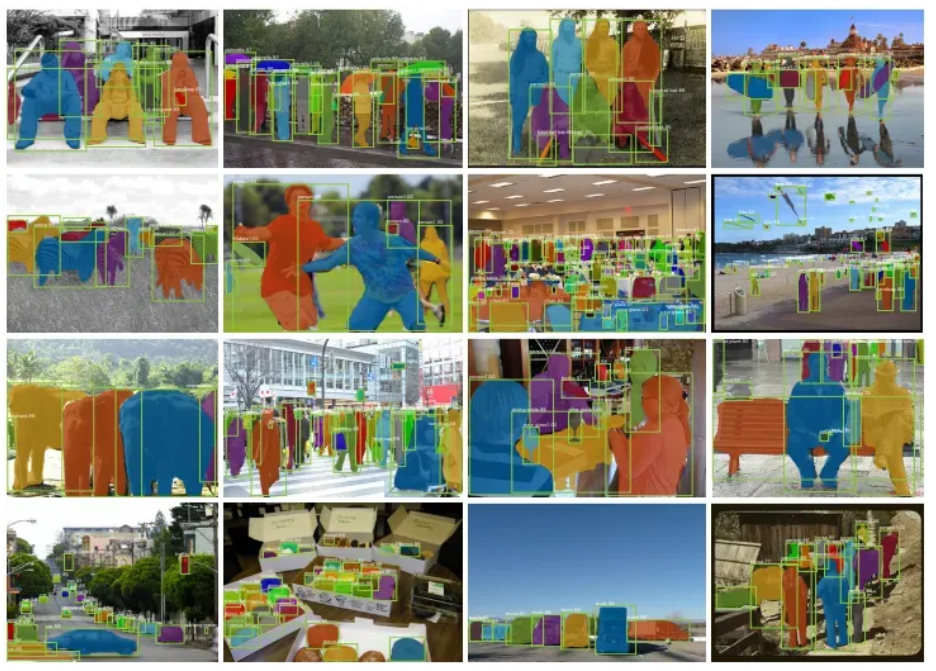

---

# 💡 Advantages of Mask R-CNN

- Handles multiple objects of the same class.
- Provides pixel-level segmentation, not just bounding boxes.
- Extends Faster R-CNN without losing accuracy or speed.
- Can be fine-tuned for custom datasets.

## 🧩 Applications

- Medical Imaging: Tumor or organ segmentation.

- Autonomous Vehicles: Detecting pedestrians, vehicles, and obstacles.

- Agriculture: Crop and weed detection.

- Video Surveillance: Tracking multiple objects in real-time.

- Robotics: Object manipulation and scene understanding.

## ⚡ Key Points to Remember

- Mask R-CNN = Faster R-CNN + Mask Branch

- Predicts boxes, classes, and masks simultaneously.

- Requires pre-trained weights for practical usage.

- Can be customized for specific datasets.

C:\Users\bhagi\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


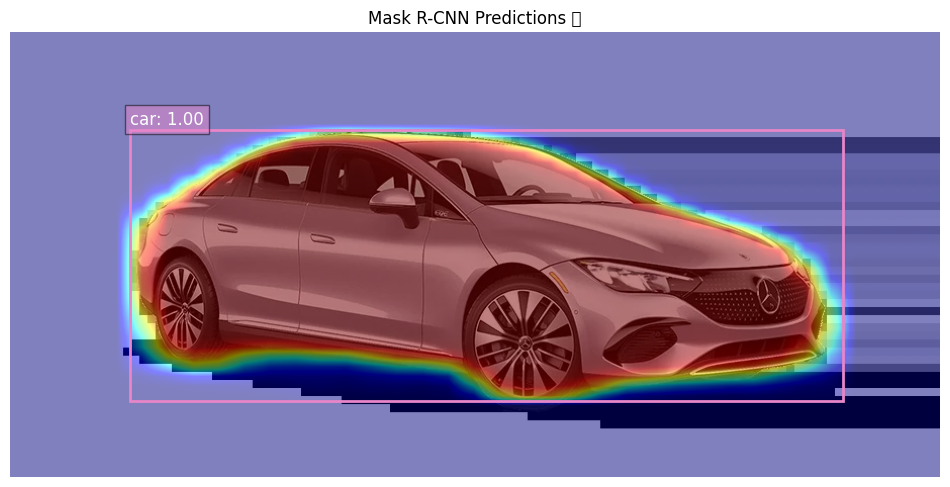

Top Detected Objects 🎯
car: 1.00


In [32]:
# -----------------------------
# 1️ Import Libraries
# -----------------------------
import torch
from torchvision.models.detection import maskrcnn_resnet50_fpn, MaskRCNN_ResNet50_FPN_Weights
from PIL import Image
import torchvision.transforms as T
import matplotlib.pyplot as plt
import numpy as np
import random

# -----------------------------
# 2️  Class Names
# -----------------------------
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter',
    'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe',
    'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle',
    'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange',
    'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant',
    'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
    'teddy bear', 'hair drier', 'toothbrush'
]

# -----------------------------
# 3️ Load Pretrained Model
# -----------------------------
weights = MaskRCNN_ResNet50_FPN_Weights.COCO_V1
model = maskrcnn_resnet50_fpn(weights=weights)
model.eval()

# -----------------------------
# 4️ Load and Preprocess Image
# -----------------------------
image_path = "carimage.jpg"  # Replace with your image path
image = Image.open(image_path).convert("RGB")
transform = weights.transforms()
img_tensor = transform(image)

# -----------------------------
# 5️ Run Inference 
# -----------------------------
with torch.no_grad():
    predictions = model([img_tensor])[0]
    # -----------------------------
# 6️ Visualize Results
# -----------------------------
image_np = np.array(image)
fig, ax = plt.subplots(1, figsize=(12,12))
ax.imshow(image_np)

threshold = 0.5  # Confidence threshold

for i, score in enumerate(predictions['scores']):
    if score > threshold:
        box = predictions['boxes'][i].numpy()
        mask = predictions['masks'][i,0].numpy()
        label = COCO_INSTANCE_CATEGORY_NAMES[predictions['labels'][i]]
        color = (random.random(), random.random(), random.random())  # random color

        # Draw bounding box
        ax.add_patch(plt.Rectangle(
            (box[0], box[1]),
            box[2]-box[0],
            box[3]-box[1],
            fill=False, color=color, linewidth=2
        ))

        # Overlay mask
        ax.imshow(mask, alpha=0.5, cmap='jet')

        # Add label text
        ax.text(box[0], box[1]-5, f"{label}: {score:.2f}", color='white', fontsize=12,
                bbox=dict(facecolor=color, alpha=0.5))

plt.title("Mask R-CNN Predictions 🎯")
plt.axis('off')
plt.show()

# -----------------------------
# 7️ Print Top Predictions
# -----------------------------
print("Top Detected Objects 🎯")
for i, score in enumerate(predictions['scores']):
    if score > threshold:
        label = COCO_INSTANCE_CATEGORY_NAMES[predictions['labels'][i]]
        print(f"{label}: {score:.2f}")

## Explanation

### **Code Breakdown**

- **Imports**

    - `torch` → PyTorch core library.
    
    - `maskrcnn_resnet50_fpn`, `MaskRCNN_ResNet50_FPN_Weights` → Pretrained Mask R-CNN model and its weights.
    
    - `PIL.Image` → For image loading.
    
    - `torchvision.transforms` → For preprocessing images.
    
    - `matplotlib.pyplot` → To visualize results.
    
    - `numpy` → To convert images for plotting.
    
    - `random` → To generate random colors for boxes/masks.

- **COCO Class Names**

    - A list of **80 object classes** from COCO dataset, plus `__background__`.
    
    - Used to map predicted class indices to human-readable labels.
- **Load Pretrained Mask R-CNN**
    
    - `weights = MaskRCNN_ResNet50_FPN_Weights.COCO_V1` → Load pretrained weights.
    
    - `model = maskrcnn_resnet50_fpn(weights=weights)` → Initialize the model.
    
    - `model.eval()` → Set model to evaluation mode (disables training features like dropout).

- **Load and Preprocess Image**

    - `image = Image.open(image_path).convert("RGB")` → Open the image and ensure it’s RGB.
    
    - `transform = weights.transforms()` → Use built-in preprocessing for Mask R-CNN (normalization, resizing, etc.).
    
    - `img_tensor = transform(image)` → Convert the image to a PyTorch tensor ready for the model.

- **Run Inference**

    - Wrap in `torch.no_grad()` → No gradient computation, faster inference.
    
    - `predictions = model([img_tensor])[0]` → Model predicts for a **single image**. Output contains:
    
        - `'boxes'` → Bounding boxes `[x1, y1, x2, y2]`.
        
        - `'labels'` → Class IDs (integer indices for COCO classes).
        
        
        - `'scores'` → Confidence scores for each detection.
        
        - `'masks'` → Segmentation masks for each detected object.
- **Visualize Results**
    
    - Convert image to numpy array: `image_np = np.array(image)`.
    
    - Create Matplotlib figure and axis.
    
    - Loop through predictions:
    
        - Only consider detections with `score > 0.5` (confidence threshold).
        
        - Extract bounding box, mask, label, and random color.
        
        - Draw **bounding box** using `plt.Rectangle`.
        
        - Overlay **mask** with semi-transparency (`alpha=0.5`) and `cmap='jet'`.
        
        - Add **text label** with class name and score on top of the box.
    
    - `plt.show()` → Display the final annotated image.

- **Print Top Predictions**

    - Loop through scores > threshold.
    
    - Print the **class name and confidence score** of each detected object.

---

## 3. GANs
 

## Generative Adversarial Networks (GANs): A Deep Dive

## 📖 Introduction

Generative Adversarial Networks (GANs) are a powerful class of neural networks introduced by Ian Goodfellow et al. in 2014.

They belong to the family of generative models, meaning they can learn a data distribution and generate new, synthetic samples that mimic real data.

At a high level:

- Generator (G): Creates fake samples that look like real ones.

- Discriminator (D): Judges whether samples are real (from dataset) or fake (from G).

- Together, they engage in a zero-sum adversarial game.

Generative Adversarial Networks (GAN) help machines to create new, realistic data by learning from existing examples. It is introduced by Ian Goodfellow and his team in 2014 and they have transformed how computers generate images, videos, music and more. 

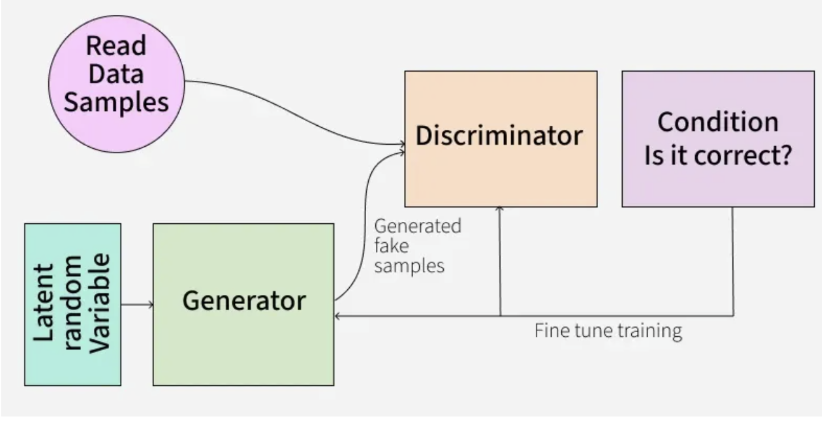

## **❓** Why Use GANs?

The goal of generative models is to capture the data distribution and generate new samples.

GANs stand out because:

- Their adversarial training produces sharp, realistic outputs, unlike some earlier models (e.g., VAEs) that produced blurry results.

- They can be applied to many domains (images, text, audio, 3D models).

- They learn without explicit supervision no labeled data required.

Key motivation: GANs push the generator to improve until its outputs are indistinguishable from real data.

---

## ⚙️ What Are GANs?

Think of GANs as a game between a Forger and a Critic:

- The Forger (Generator): Creates fake paintings (data).

- The Critic (Discriminator): Learns to detect fakes.

- Both improve iteratively:
    - As the Critic improves, the Forger must also improve.
    - Eventually, the Forger becomes so good that the Critic can’t reliably tell real from fake.

This process produces a generator capable of creating highly realistic samples.

---

## 🔬 How Do GANs Work?

### 1. Generator (G)

- Input: Random noise vector `z` (latent variable).

- Output: Fake sample resembling real data (e.g., an image).

- Objective: Fool the discriminator into believing fake samples are real.

### 2. Discriminator (D)

- Input: A sample (real or fake).
- Output: Probability (1 = real, 0 = fake).
- Objective: Correctly distinguish real from fake.

---

### 🎯 Training Process

1. Train D:
    - Show it a batch of real samples and fake samples from G.
    - Update D to maximize correct classification.
2. Train G:
    - Generate fake samples.
    - Use D’s feedback as a loss signal.
    - Update G to minimize D’s ability to spot fakes.

---

### 🧮 Objective Function (minimax game)

- D wants: Maximize both terms (be good at spotting fakes).
- G wants: Minimize the second term (fool D).

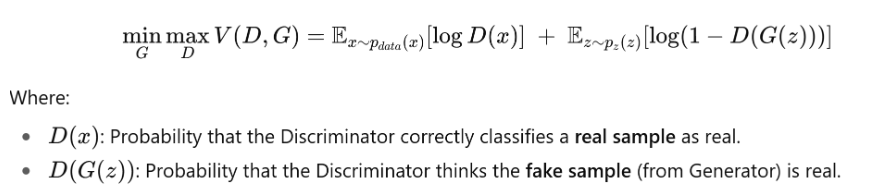

✅ Training ends at Nash equilibrium → G produces samples so realistic that D’s accuracy drops to 50%.

## 🌍 Applications of GANs

GANs are applied across industries:

- Image generation: Creating realistic faces, objects, or scenes.

- Image-to-image translation: Sketch → photo, day ↔ night, map ↔ satellite.

- Super-resolution (SRGAN): Upscaling low-resolution images.

- Data augmentation: Generate synthetic data for scarce datasets (e.g., medical).

- Text-to-image synthesis: Generate images from text descriptions.

- Art & style transfer: Apply artistic styles (e.g., Van Gogh filter).

- 3D model generation: Create 3D structures from 2D images.

- Anomaly detection: Detect fraud or unusual patterns by modeling “normal” data.

---

## 🧩 Types of GANs

- Vanilla GAN: Original MLP-based GAN.

- Conditional GAN (cGAN): Adds labels/conditions for controlled generation.

- Deep Convolutional GAN (DCGAN): Uses CNNs; more stable & better for images.

- CycleGAN: Unpaired image-to-image translation (e.g., horses ↔ zebras).

- Pix2Pix: Paired image translation.

- StyleGAN / StyleGAN2: Fine-grained style control → state-of-the-art photorealistic faces.

- SRGAN: Super-resolution GAN.

- Wasserstein GAN (WGAN/WGAN-GP): Improves stability using Wasserstein distance.

- InfoGAN: Learns disentangled latent factors.

- Adversarial Autoencoders (AAE): GAN in latent space.

---

## ✅ Pros and ⚠️ Cons of GANs

### Pros

- Unsupervised learning: No need for labels.

- High-quality results: Sharp, realistic outputs.

- Versatile: Works on images, video, text, audio.

- Fast sampling: One forward pass generates a sample.

### Cons & Limitations

- Training instability: Balancing G and D is difficult.

- Mode collapse: G produces limited variety of samples.

- Hard to evaluate: No universal “quality” metric.

- High computational cost: Requires strong GPUs.

- Hyperparameter sensitivity: Needs careful tuning.

---

## ⚠️ Training Challenges & Tips

Common Issues:

- Mode collapse

- Vanishing gradients

- Oscillating loss

- Discriminator overpowering generator

Tips:

- Use non-saturating loss for G.

- Prefer WGAN-GP for stability.

- Apply spectral normalization.

- Use progressive growing (for high-res).

- Try mini-batch discrimination.

- Monitor FID/IS metrics instead of loss alone.

---

## 📊 Evaluation Metrics

- Inception Score (IS): Measures quality + diversity.

- Frechet Inception Distance (FID): Compares real vs fake distributions (lower = better).

- Precision & Recall: Balance between sample quality and diversity.

- Human evaluation: Still useful in practice.

---

In [18]:
# Simple GAN in PyTorch 
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# 1️⃣ Hyperparameters
lr = 0.0002
batch_size = 64
latent_dim = 100   # size of random noise vector
epochs = 5

# 2️⃣ Data (MNIST digits)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # scale to [-1, 1]
])
dataset = datasets.MNIST(root="./data", train=True, transform=transform, download=True)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

**Code Explination**

**1. Imports and Setup**

- `torch`, `nn`, `optim`: Core PyTorch libraries.
- `datasets`, `transforms`: To load MNIST images and preprocess them.
- `DataLoader`: For batching and shuffling data.

**2. Hyperparameters**

- `latent_dim`: The Generator starts from random noise of 100 dimensions.
- `epochs`: More epochs = better images, but slower training.

**3. Data (MNIST digits)**

- Loads MNIST (handwritten digits).
- Normalization is important because Generator uses `Tanh()` which outputs in `[-1,1]`.
- `dataloader`: Supplies mini-batches during training.

In [19]:
# 3️⃣ Generator Network (G)
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 784),
            nn.Tanh()  # output between -1 and 1
        )
    def forward(self, z):
        return self.model(z).view(-1, 1, 28, 28)  # reshape to image

# 4️⃣ Discriminator Network (D)
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 1),
            nn.Sigmoid()  # output probability
        )
    def forward(self, img):
        return self.model(img.view(-1, 784))

**Code Explination**

**4. Generator (G)**

- Input: **random noise** of size 100.
- Output: A **28×28 pixel image** (flattened to 784 then reshaped).
- `Tanh`: Makes pixels between -1 and 1.
- Think of G as a **forger** making fake digits.

**5. Discriminator (D)**

- Input: A **28×28 image** (flattened).
- Output: Probability (0 = fake, 1 = real).
- Uses **LeakyReLU** (helps avoid dead neurons).
- Think of D as a **detective** spotting fakes.

In [20]:
# 5️⃣ Initialize networks
G = Generator()
D = Discriminator()

# Loss & Optimizers
criterion = nn.BCELoss()
optimizer_G = optim.Adam(G.parameters(), lr=lr)
optimizer_D = optim.Adam(D.parameters(), lr=lr)

# 6️⃣ Training Loop
for epoch in range(epochs):
    for i, (real_imgs, _) in enumerate(dataloader):
        
        batch_size = real_imgs.size(0)

        # Real and fake labels
        real_labels = torch.ones(batch_size, 1)
        fake_labels = torch.zeros(batch_size, 1)

        # Train Discriminator
        optimizer_D.zero_grad()
        outputs = D(real_imgs)
        loss_real = criterion(outputs, real_labels)

        z = torch.randn(batch_size, latent_dim)  # random noise
        fake_imgs = G(z)
        outputs = D(fake_imgs.detach())
        loss_fake = criterion(outputs, fake_labels)

        loss_D = loss_real + loss_fake
        loss_D.backward()
        optimizer_D.step()

        # Train Generator
        optimizer_G.zero_grad()
        outputs = D(fake_imgs)
        loss_G = criterion(outputs, real_labels)  # want D(fake)=1
        loss_G.backward()
        optimizer_G.step()

    print(f"Epoch [{epoch+1}/{epochs}]  Loss_D: {loss_D.item():.4f}, Loss_G: {loss_G.item():.4f}")

print("✅ Training Finished! Now G can generate digits.")

Epoch [1/5]  Loss_D: 0.8548, Loss_G: 0.9353
Epoch [2/5]  Loss_D: 0.9804, Loss_G: 1.0960
Epoch [3/5]  Loss_D: 0.9213, Loss_G: 1.0673
Epoch [4/5]  Loss_D: 1.1898, Loss_G: 0.8896
Epoch [5/5]  Loss_D: 1.0195, Loss_G: 0.9626
✅ Training Finished! Now G can generate digits.


**Code Explination**

**6. Loss & Optimizers**

- **BCE Loss**: Works well for binary classification (real vs fake).
- **Adam optimizer**: Common choice for GANs.

**7. Training Loop**

Iterates through dataset, each loop has two steps:

**Step A: Train Discriminator (D)**

- D sees **real samples** (label=1) and **fake samples** (label=0).
- Learns to distinguish real vs fake.
- `.detach()`: Prevents gradients flowing into G while training D.

**Step B: Train Generator (G)**

- G wants D to **classify fake images as real** (label=1).
- So loss is calculated against `real_labels`.
- Updates G so its images look more real.

**8. Print Progress**

- Shows losses of both networks each epoch.
- Balanced losses = healthy training.

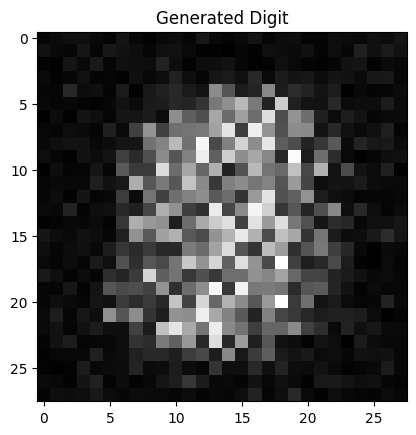

In [21]:
import matplotlib.pyplot as plt

z = torch.randn(1, latent_dim)
fake_img = G(z).detach().view(28, 28)

plt.imshow(fake_img, cmap="gray")
plt.title("Generated Digit")
plt.show()

**Code Explination**

- **`z = torch.randn(1, latent_dim)`**
    - Creates a **random noise vector** (input for the Generator).
- **`fake_img = G(z).detach().view(28, 28)`**
    - Passes noise through the **Generator (G)** to create a fake digit.
    - `.detach()` → removes it from the computation graph (no gradients needed).
    - `.view(28, 28)` → reshapes output into an image size (28×28 pixels).
- **`plt.imshow(fake_img, cmap="gray")`**
    - Displays the generated image in grayscale.
- **`plt.title("Generated Digit")`**
    - Adds a title to the plot.
- **`plt.show()`**
    - Renders the fake digit image on screen.

**Output**

- The image is a noisy patch, which means the Generator is still in the “random noise” stage.
- With more training, it will start forming shapes that resemble MNIST digits.

---

# 4. Interpretability

## **What is Model Interpretability?**

- The ability to understand and explain how a deep learning model makes its predictions.

- Classic ML models (trees, linear models) are interpretable by design. Deep neural networks are “black boxes”, making interpretability hard.

## **Why Interpretability Matters**

1. Trust & Transparency
    - Critical in domains like healthcare, finance, legal systems. Stakeholders need to know why a decision was made.
      
2. Bias Detection & Mitigation
    - Helps uncover if the model relies on unfair or sensitive features, enabling corrective action.
      
3. Model Debugging
    - Interpretation reveals which features influence predictions helps improve performance or fix errors.
      
4. Regulatory Compliance
    - Laws like GDPR demand explanations for automated decisions; interpretability is a must-have.

---

## Methods for Achieving Interpretability

Interpretability techniques are classified into two main categories: Intrinsic and Post-hoc.

### 🔍 1. Intrinsic Interpretability

Models that are understandable by design:

- Shallow models: Decision trees, linear/logistic regression → transparent decision rules or weights.
- Attention mechanisms: Especially in transformer models highlight where the model focuses (e.g. translating a word, captioning an image).

### 🛠 2. Post-hoc Interpretability

While deep learning models are inherently complex, several methods have been developed to improve their interpretability. These methods can broadly be classified into intrinsic interpretability and post-hoc interpretability.

- Feature importance:
    - SHAP (Shapley Additive Explanations) and LIME (Local Interpretable Model-agnostic Explanations) show how much each input feature influenced a given prediction.
      
- Saliency maps:
    - Visualize which pixel regions in an image impact classification most.
      
- Activation maximization:
    - Generate input patterns that strongly activate specific neurons, revealing what they represent.
      
- Surrogate models:
    - Train a simpler, interpretable model (like a decision tree) to mimic the behavior of a complex model and use it for explanation.

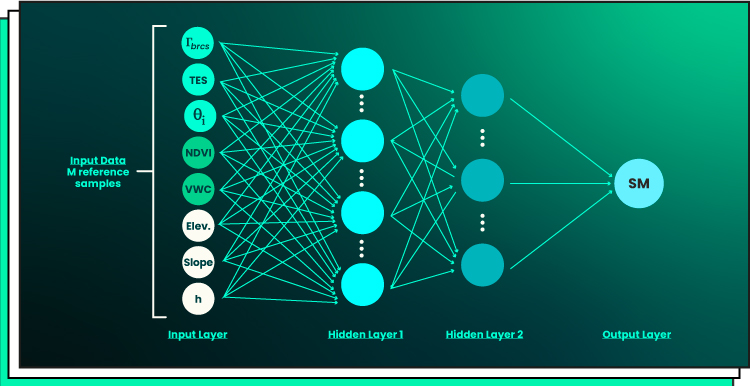

---

## Challenges in Interpretability

Even with methods in place, several issues persist:

1. Accuracy vs Interpretability Trade-off: Simple models are easier to interpret but often perform worse than deep networks. Balancing both is tricky. 
    
    
2. Black-box Complexity: Deep models’ non-linear multi-layer structure defies simple explanation—even post-hoc methods offer only rough approximations. 
    
    
3. Subjectivity: What’s “interpretable” depends on your audience. A data scientist vs a domain expert (e.g. doctor) may require different explanations. 
    
    
4. Scalability: Techniques like SHAP or saliency maps are computationally expensive, especially on large models or datasets.

---

## Applications of Model Interpretability

Model interpretability is becoming increasingly crucial in several domains:

- **Healthcare**: In medical applications, interpretability can help doctors and healthcare professionals trust AI-driven diagnoses by providing explanations for why a model predicts a particular condition.
  
- **Finance**: Financial institutions are subject to regulations requiring explanations for automated decisions, such as loan approvals. Interpretability ensures compliance and helps build trust with customers.

  
- **Legal Systems**: AI is being used in legal systems to recommend sentences or assess risk. Interpretability ensures that these decisions can be explained and scrutinized, preventing potential biases from going unchecked.

  
- **Autonomous Vehicles**: Understanding the decisions made by AI systems in self-driving cars is critical for safety and regulatory approval.

---

## Summary Table

| Category | Method | What It Does | Pros / Cons |
| --- | --- | --- | --- |
| **Intrinsic** | Decision trees, attention models | Transparent by design | Easy to explain / May underperform on complex data |
| **Post-hoc** | SHAP, LIME, Saliency, Activation | Explains trained deep models | Flexible / May be approximate or slow |
| **Surrogate** | Interpretable mimic model | Emulates complex model’s decision logic | Good for insight / could misrepresent behavior |

---

---

## Feature visualization
Feature visualization is an interpretability technique which can generate representations to gain insights into the concepts that neural networks have learned.

For example, after training an image classifier to classify animals, we can ask the network to output a picture of what it (with highest possible probability) would consider to be "dog-ish". This picture can then be considered a visualization of the network's dog-detecting “feature”. Such a picture, however, will often not look anything like what a human would call a dog.

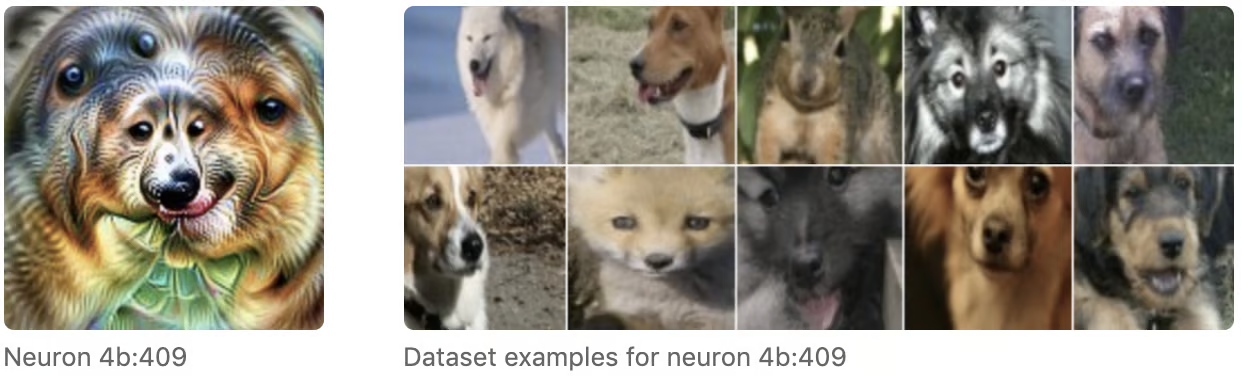

## Goals of Feature Visualization

1. Interpret learned representations
    - Understand how inputs (like pixels, words, or signals) are transformed into features at different layers.
      
2. Debug models
    - Detect if the network is learning irrelevant patterns (e.g., background noise instead of actual objects).
      
3. Trust & transparency
    - Shows users why the model classifies something in a certain way.
      
4. Improve architecture design
    - Provides insights for tuning filters, layer depths, or activation functions.

---

## Approaches to Feature Visualization

### 🔹 1. Activation Visualization

- Visualize the activations (feature maps) of different layers when an input passes through the network.

- Example: Feeding an image into a CNN and visualizing intermediate layer outputs (edges, textures, shapes).

- Low-level layers → simple features (edges, colors).

- High-level layers → abstract concepts (object parts, faces).

---

### 🔹 2. Filter (Weight) Visualization


- Visualize the learned filters (kernels) of convolutional layers directly.

- In early layers, filters look like edge detectors, color blobs.

- In deeper layers, filters become complex patterns (textures, object parts).

---

### 🔹 3. Activation Maximization

- Generate synthetic input images that maximize the activation of a specific neuron/filter.

- Shows what kind of input the neuron is most responsive to.

- Helps answer: “What does this neuron care about?”

---

### 🔹 4. Deconvolution & Guided Backpropagation

- Project feature activations back to input space to see which parts of the input caused strong responses.

- Gives pixel-level visualization of important regions.

---

### 🔹 5. Class Activation Maps (CAM & Grad-CAM)

- Highlight regions in the input image that influenced the model’s decision.

- Widely used in CNN interpretability.

- Example: For an image classified as “dog,” Grad-CAM shows which pixels contributed most to that classification.

## Advantages of Feature Visualization

- Improves model transparency.

- Helps debug overfitting or bias (e.g., network focusing on background instead of object).

- Aids in trust building with stakeholders.

---

## Limitations

- Visualizations may be abstract and hard to interpret for humans.

- Can give approximate or misleading insights (not always 100% faithful).

- Computationally expensive for deep architectures.

---

## ✅ Quick Recap Table

| Method | What It Shows | Example Use Case |
| --- | --- | --- |
| **Activation Maps** | Outputs of intermediate layers | See edges/shapes detected |
| **Filter Visualization** | Weights of CNN kernels | Understand what features filters detect |
| **Activation Maximization** | Input that excites a neuron most | Find neuron’s preferred pattern |
| **Deconv / Guided Backprop** | Map activations back to input space | Pixel-level importance |
| **Grad-CAM** | Heatmap of class-specific importance | Which image regions drove the prediction |



In [29]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input


## Explanation

- matplotlib.pyplot → for plotting images and visualizations.

- numpy → for array manipulations.

- tensorflow → main deep learning framework.

- VGG16 → pretrained convolutional neural network from Keras.

- image & preprocess_input → load and preprocess images in a format suitable for VGG16.

In [30]:
model = VGG16(weights='imagenet', include_top=False)


- weights='imagenet' → loads pretrained weights trained on ImageNet.

- include_top=False → removes fully connected layers at the end, keeping only convolutional layers.

- This allows us to use VGG16 as a feature extractor.

In [31]:
img_path = "catimage.jpg"  # Replace with your image path
img = image.load_img(img_path, target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)


- Loads the cat image and resizes it to 224x224 (VGG16 input size).

- Converts image to a NumPy array.

- Expands dimensions to (1,224,224,3) because Keras models expect a batch of images.

- preprocess_input → scales pixel values to match VGG16 expectations.

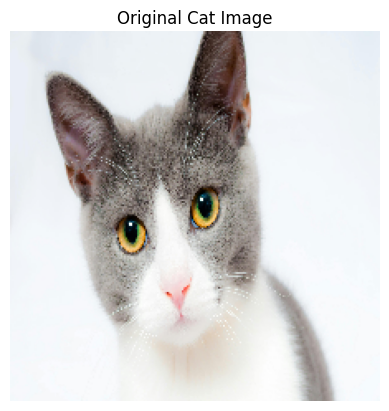

In [32]:
plt.imshow(img)
plt.title("Original Cat Image")
plt.axis("off")
plt.show()


- Plots the original cat image for reference.

In [33]:
feature_model = tf.keras.models.Model(inputs=model.input, outputs=model.output)
features = feature_model.predict(x)  # shape: (1, 7, 7, 512)
feature_vector = features.flatten()  # shape: (7*7*512,)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 678ms/step


- Creates a new model that outputs the last convolutional layer of VGG16.

- features → the activations of the last conv layer (1,7,7,512).

- .flatten() → converts 7×7×512 into a 1D vector of size 25088.

- This feature vector can be used for machine learning tasks like clustering, classification, or similarity search.

In [34]:
print("Feature vector shape:", feature_vector.shape)


Feature vector shape: (25088,)


- Confirms the size of the extracted features.

In [35]:
first_layer_model = tf.keras.models.Model(inputs=model.input, outputs=model.get_layer('block1_conv1').output)
activations = first_layer_model.predict(x)  # shape: (1, 224, 224, 64)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


- Creates a model to output the activations (feature maps) of the first convolutional layer.

- activations → each channel shows what the first conv layer “sees” in the image.

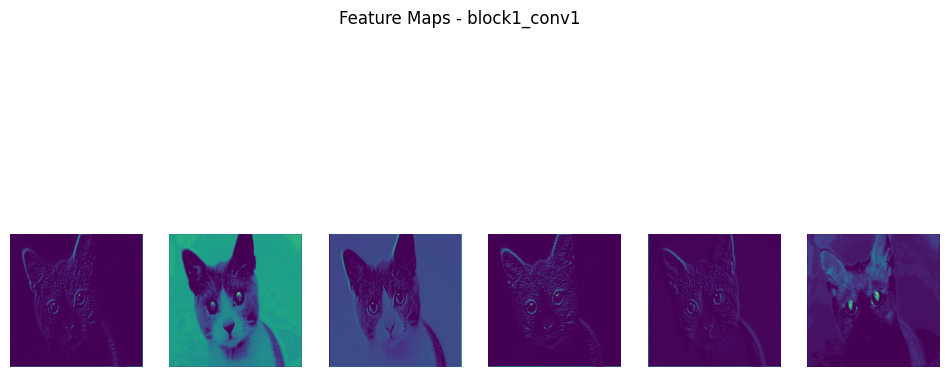

In [36]:
n_features = 6
plt.figure(figsize=(12,6))
for i in range(n_features):
    ax = plt.subplot(1, n_features, i+1)
    plt.imshow(activations[0,:,:,i], cmap='viridis')
    plt.axis('off')
plt.suptitle("Feature Maps - block1_conv1")
plt.show()


- Visualizes 6 feature maps from the first conv layer.

- Shows which patterns or edges the CNN detects at the earliest stag

In [37]:
filters, biases = model.get_layer('block1_conv1').get_weights()
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)


- Gets the learned weights (filters/kernels) of the first conv layer.

- Normalizes them to [0,1] for visualization.

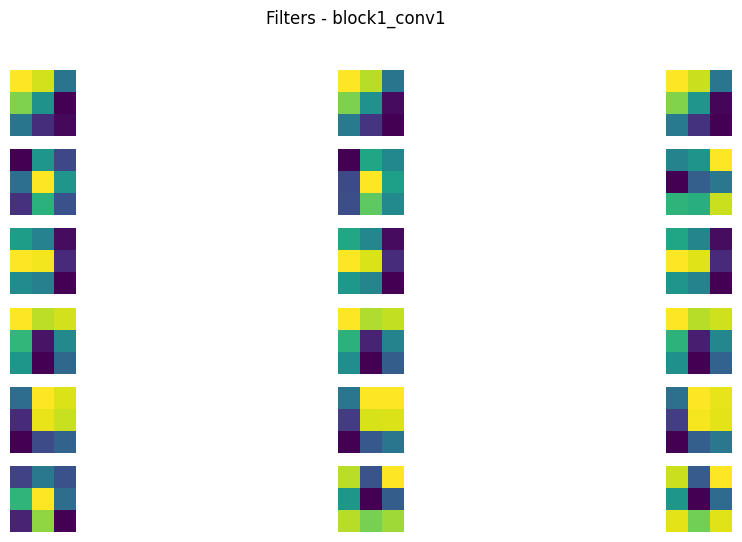

In [38]:
plt.figure(figsize=(12,6))
for i in range(n_features):
    f = filters[:,:,:,i]
    for j in range(3):  # RGB channels
        ax = plt.subplot(n_features, 3, i*3+j+1)
        plt.imshow(f[:,:,j], cmap='viridis')
        plt.axis('off')
plt.suptitle("Filters - block1_conv1")
plt.show()


- Plots filters of the first conv layer.

- Each filter shows what type of patterns the CNN learned to detect in the RGB channels (edges, colors, textures).

---

# Grad-CAM, saliency maps


# Grad-CAM (Gradient-weighted Class Activation Mapping)

## 1️⃣ What is Grad-CAM?

- Grad-CAM is a visual explanation technique for CNN-based models.

- It shows which parts of an image are most important for the model’s decision.

- Uses the gradients of the target class flowing into the final convolutional layer to produce a heatmap.

- Helps in interpreting deep learning models, especially for image classification, object detection, and segmentation.

---

## 2️⃣ Why Grad-CAM?

- CNNs are black boxes; we don’t know why they make certain predictions.

- Grad-CAM highlights image regions that influence the prediction.

- Useful for:
    - Debugging models
    - Detecting biases
    - Improving trust in AI predictions

---

## 3️⃣ Key Idea

1. Take the final convolutional layer (because it retains spatial info + high-level features).

2. Compute gradients of the target class score w.r.t. this layer’s feature maps.

3. Average the gradients spatially to get importance weights for each feature map.

4. Weight the feature maps by these gradients.

5. Apply ReLU to keep only positive influences.

6. Overlay the result on the original image → class-specific heatmap.


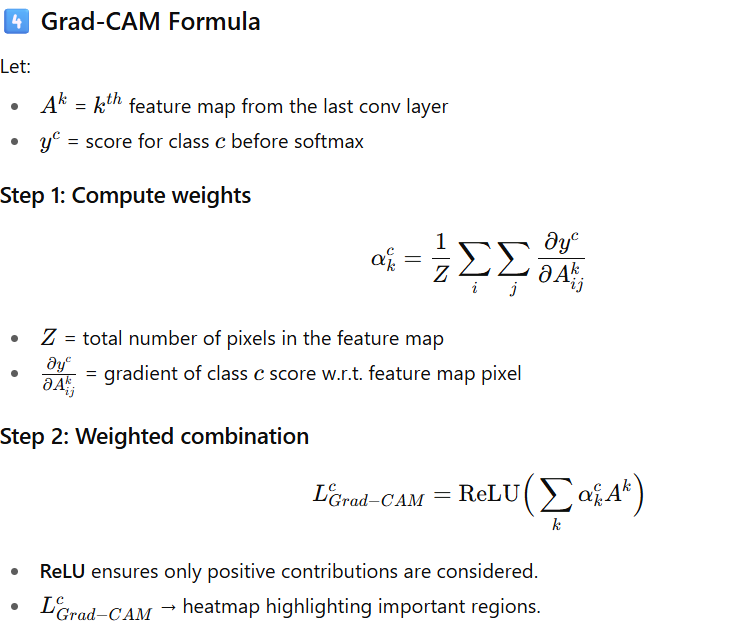

## **5. Pros and Cons**

### **Pros**

- Works with any CNN-based model.

- Provides class-discriminative explanations.

- Simple to compute.

### **Cons**

- Only explains spatial importance, not pixel-level details.

- Low resolution if last conv layer is very coarse.

- Can be misleading if model relies on global context outside highlighted regions.

---

## **6. Variants**

- **Grad-CAM++** → Better localization for multiple instances of the same class.

- **Score-CAM** → Uses forward passing score instead of gradients.

- **Smooth Grad-CAM** → Reduces noise by averaging over multiple inputs with noise.

---

---

# 🔍 Saliency Maps in Convolutional Neural Networks (CNNs)

## 🖼️ What Are Saliency Maps?

- Highlight the regions in an image that most influence a CNN's prediction

- Help visualize where the model is “looking” when making decisions

---

## 🤔 Why Are Saliency Maps Important?

- Interpretability: Understand the decision-making process of neural networks

- Debugging: Identify if the model is focusing on correct features

- Trustworthiness: Essential for critical applications like healthcare

- Transparency: Explain AI predictions to non-technical users

---

## 🔥 How Are Saliency Maps Generated?

- Forward Pass: Pass the input image through the CNN

- Backward Pass: Compute gradients of the output with respect to the input image

- Visualization: Absolute values of gradients are visualized as a heatmap

---

## 📍 Applications of Saliency Maps

- Object Localization: Detect and highlight objects in images

- Feature Attribution: Determine which parts of the input contribute most to predictions

- Model Debugging: Check if the CNN is focusing on relevant features

- Explainable AI (XAI): Make AI decisions transparent and understandable

---

## 🌀 Limitations of Saliency Maps

- Noisy Gradients: Visualizations can be noisy and hard to interpret

- Context Loss: May not capture complex relationships in the data 🧠

- Model Dependency: Results vary across different CNN architectures 🔄

## 💡 Key Takeaways

- Saliency maps provide visual explanations of CNN predictions

- Useful for debugging, interpretability, and trust

- Have limitations and should be complemented with other explainability methods ⚖️

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input


## Explanation

- tensorflow → main library for deep learning.

- numpy → for array manipulation.

- matplotlib.pyplot → to plot images and results.

- VGG16 → pretrained CNN model for image classification.

- image & preprocess_input → to load and preprocess images in a way VGG16 expects.

In [51]:
model = VGG16(weights='imagenet')  # full VGG16


- Loads VGG16 with pretrained weights from ImageNet.

- Includes all convolutional and dense layers (full model).

- Used here to predict the class of the cat image.

In [52]:
img_path = 'catimage.jpg'  # replace with your image
img = image.load_img(img_path, target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)


- Loads the image and resizes it to 224x224, which is the input size VGG16 expects.

- Converts it to a NumPy array.

- Adds a batch dimension: shape becomes (1, 224, 224, 3).

- preprocess_input normalizes the image pixels the same way VGG16 was trained.

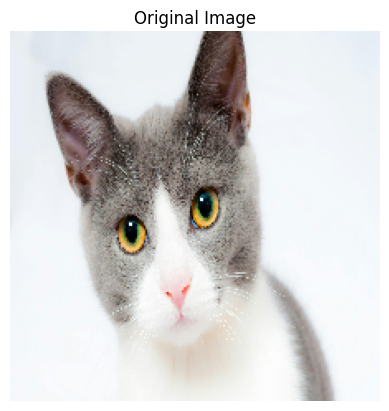

In [53]:
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")
plt.show()


- Plots the original cat image for reference.

In [54]:
preds = model.predict(x)
class_idx = np.argmax(preds[0])
print("Predicted class index:", class_idx)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 629ms/step
Predicted class index: 285


- Feeds the image into the model.

- preds contains probabilities for all 1000 ImageNet classes.

- np.argmax gets the index of the most likely class (highest probability).

In [55]:
last_conv_layer = model.get_layer('block5_conv3')
grad_model = tf.keras.models.Model([model.inputs], [last_conv_layer.output, model.output])


- Selects the last convolutional layer, important for Grad-CAM.

- Creates a new model that outputs:

    - Feature maps from the conv layer.

    - Final predictions.

In [64]:
with tf.GradientTape() as tape:
    conv_outputs, predictions = grad_model(x)
    loss = predictions[:, class_idx]


In [65]:
grads = tape.gradient(loss, conv_outputs)
pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))
heatmap = tf.reduce_sum(tf.multiply(pooled_grads, conv_outputs), axis=-1)
heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
heatmap = heatmap[0].numpy()


- Computes gradient of class score w.r.t feature maps.

- Pools gradients globally → importance weights for each filter.

- Multiplies weights with feature maps → class activation map.

- Normalizes and applies ReLU → only positive contributions.

In [66]:
import cv2
heatmap = cv2.resize(heatmap, (img.size[0], img.size[1]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR), 0.6, heatmap, 0.4, 0)


- Resizes heatmap to match image size.

- Converts to color map (JET) for visualization.

- Overlays heatmap on the original image → shows which regions influenced the model.

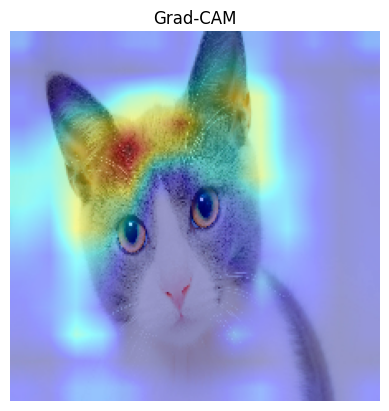

In [67]:
plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
plt.title("Grad-CAM")
plt.axis("off")
plt.show()


- Displays Grad-CAM overlay.

In [68]:
x = tf.convert_to_tensor(x)
with tf.GradientTape() as tape:
    tape.watch(x)
    preds = model(x)
    loss = preds[:, class_idx]


- Watches the input image tensor to compute gradients w.r.t it.

In [69]:
saliency = tape.gradient(loss, x)
saliency = tf.reduce_max(tf.abs(saliency), axis=-1)[0]
saliency = (saliency - tf.reduce_min(saliency)) / (tf.reduce_max(saliency) - tf.reduce_min(saliency))


- Computes gradient of class score w.r.t input pixels → sensitivity map.

- Takes max across channels (RGB) to get a single intensity map.

- Normalizes to [0,1] for plotting.

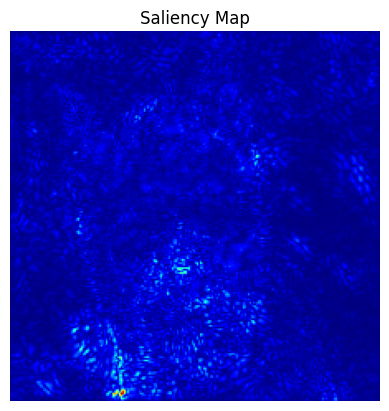

In [70]:
plt.imshow(saliency, cmap='jet')
plt.title("Saliency Map")
plt.axis("off")
plt.show()


- Plots the Saliency Map, highlighting pixels that affect the class prediction most.